In [1]:
import os,sys,torch
import pandas as pd

In [3]:
from videha.synthesizers import TwinSynthesizer,PrivateTwinSynthesizer

In [4]:
from videha.metrics import *
from videha.metrics.reports import *
from videha.metrics import compute_metrics
from videha.metrics.single_table import SingleTableMetric
from videha.metrics.single_table import *

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

In [7]:
torch.cuda.is_available()

True

###### 

## Normal API: Non-privately differentiable synthesizer

In [8]:
data = pd.read_csv(r"C:\Users\Kaggle\Videha\examples\csv\adult.csv")

In [9]:
data.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [10]:
synth = TwinSynthesizer(batch_size=200,device='cpu')   ### cpu else cuda

In [11]:
synth.fit(data=data,epochs=2,discrete_columns=discrete_columns)

Epoch: [0]  [  0/161]  eta: 0:01:35  loss_g: 2.1820 (2.1820)  loss_d: 0.0091 (0.0091)  loss: 2.1911 (2.1911)  time: 0.5904  data: 0.0000  max mem: 0
Epoch: [0]  [ 50/161]  eta: 0:00:07  loss_g: 1.6776 (1.9073)  loss_d: -0.6897 (-0.6158)  loss: 0.9831 (1.2915)  time: 0.0599  data: 0.0000  max mem: 0
Epoch: [0]  [100/161]  eta: 0:00:04  loss_g: 1.6760 (1.8310)  loss_d: 0.0466 (-0.3879)  loss: 1.7189 (1.4431)  time: 0.0614  data: 0.0000  max mem: 0
Epoch: [0]  [150/161]  eta: 0:00:00  loss_g: 1.3274 (1.6912)  loss_d: 0.1781 (-0.2200)  loss: 1.4714 (1.4712)  time: 0.0597  data: 0.0000  max mem: 0
Epoch: [0]  [161/161]  eta: 0:00:00  loss_g: 1.5388 (1.6850)  loss_d: 0.0735 (-0.1988)  loss: 1.5894 (1.4862)  time: 0.0589  data: 0.0000  max mem: 0
Epoch: [0] Total time: 0:00:10
Epoch: [1]  [  0/161]  eta: 0:00:09  loss_g: 1.3239 (1.3239)  loss_d: 0.3746 (0.3746)  loss: 1.6985 (1.6985)  time: 0.0608  data: 0.0000  max mem: 0
Epoch: [1]  [ 50/161]  eta: 0:00:06  loss_g: 1.0924 (1.3696)  loss_d: 

In [12]:
sample = synth.sample(1000)

In [13]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

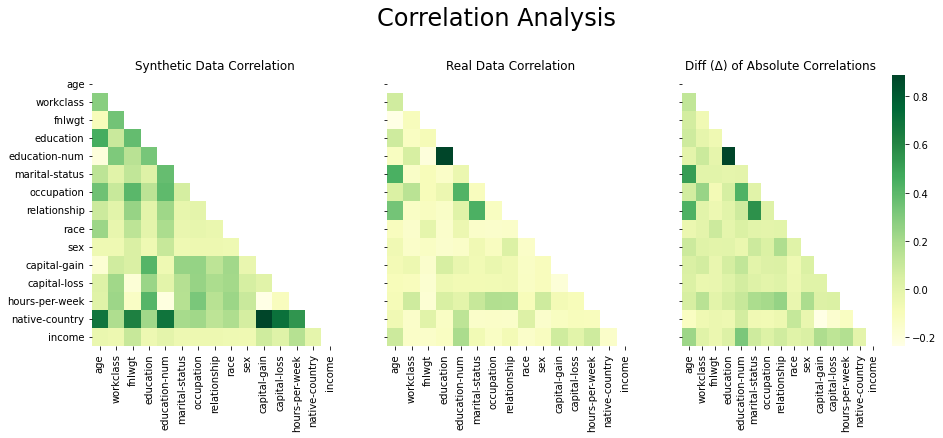

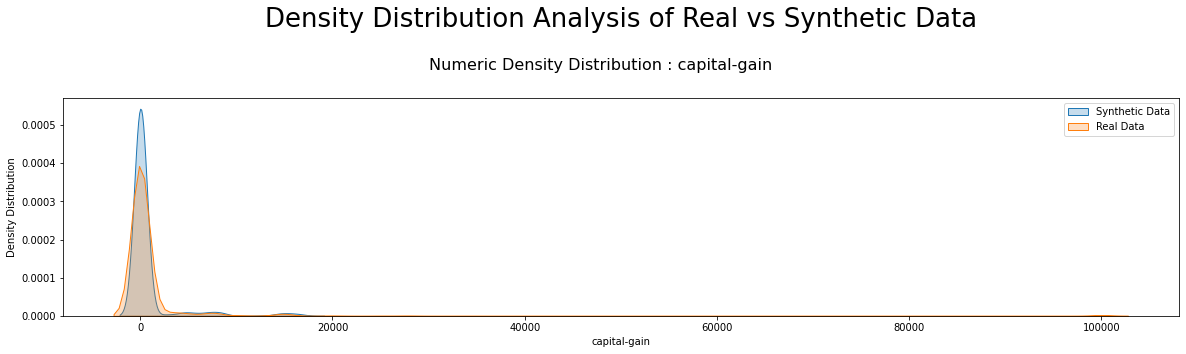

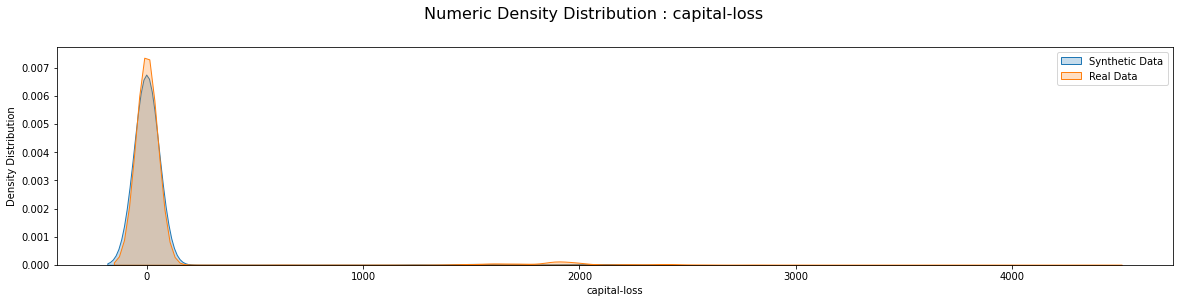

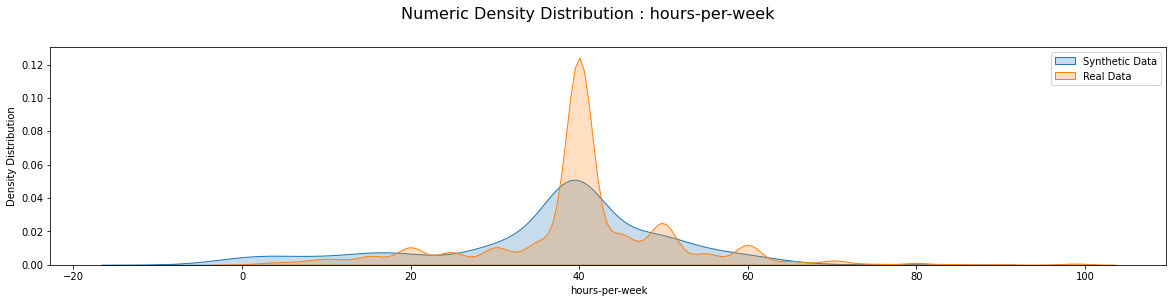

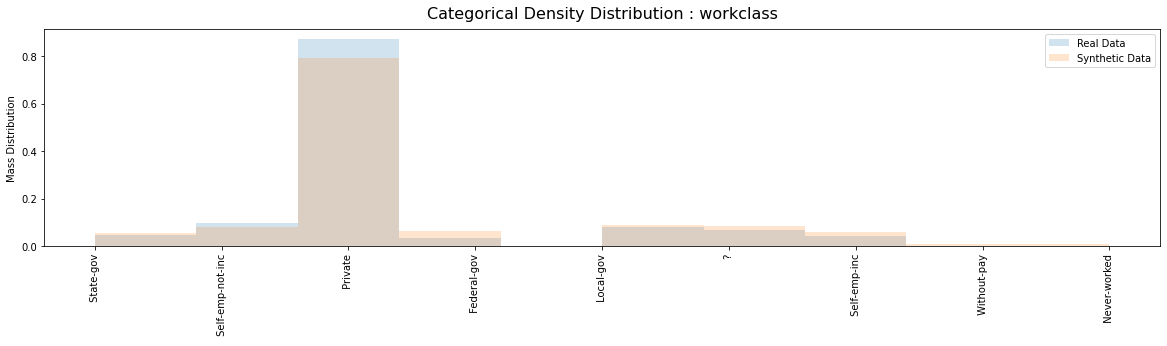

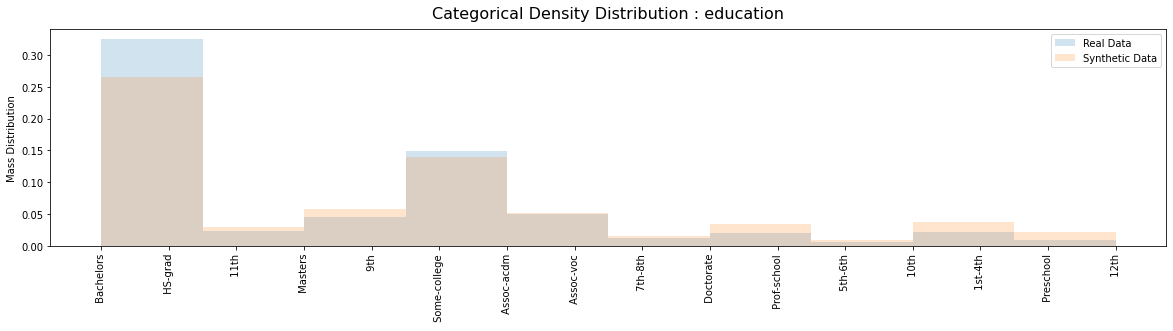

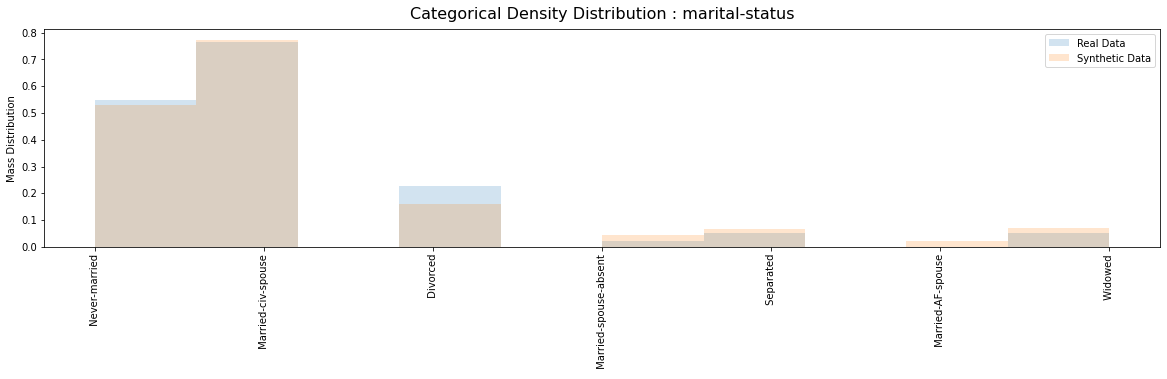

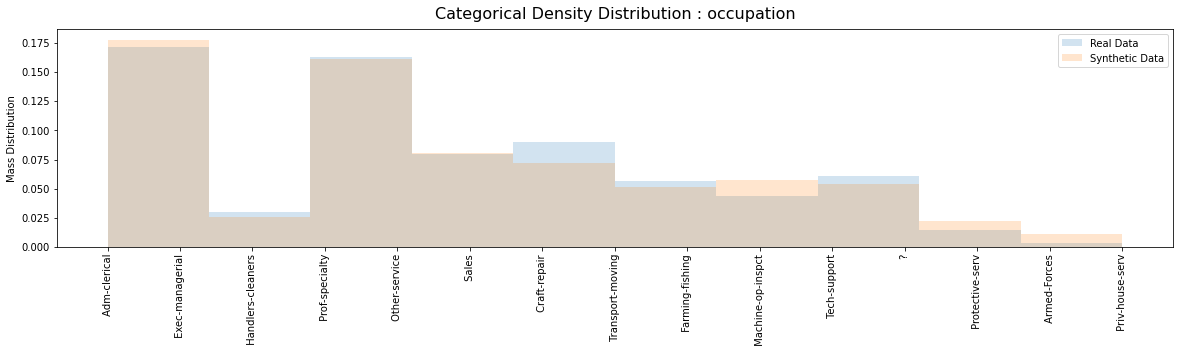

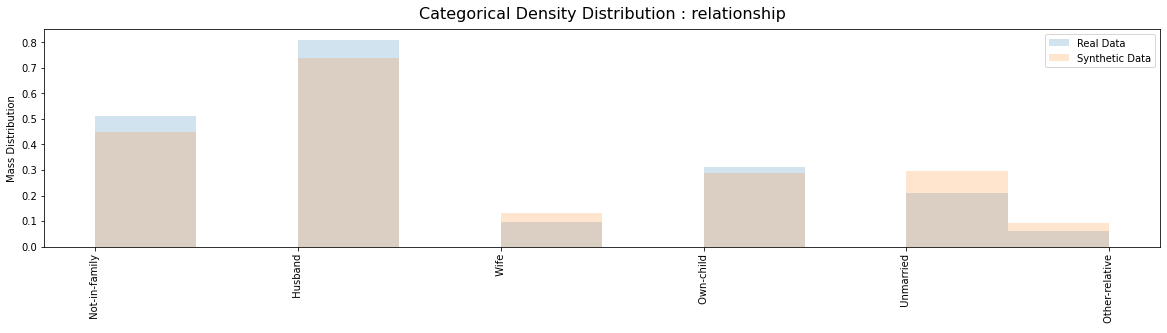

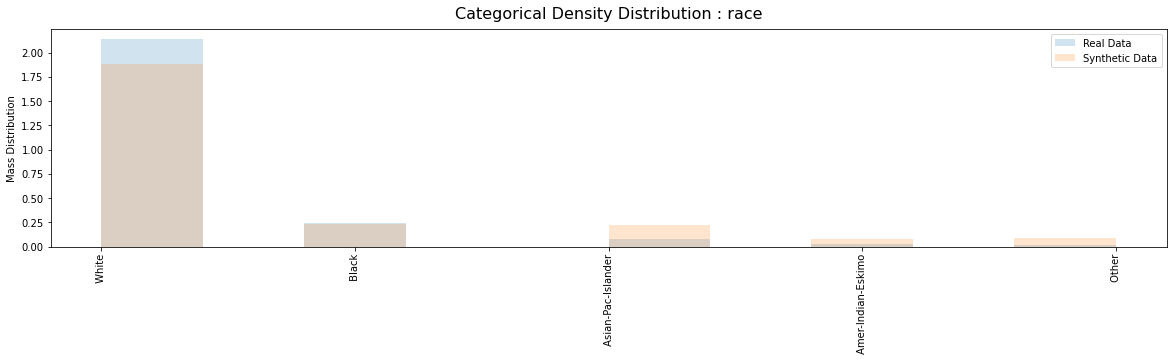

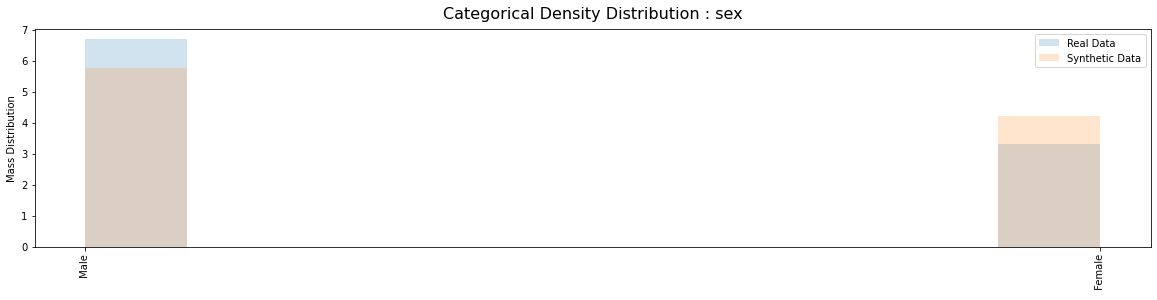

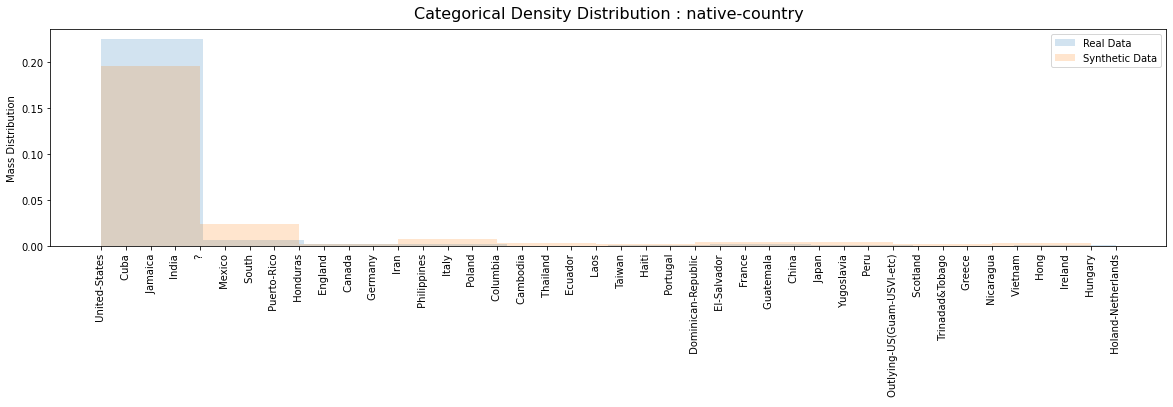

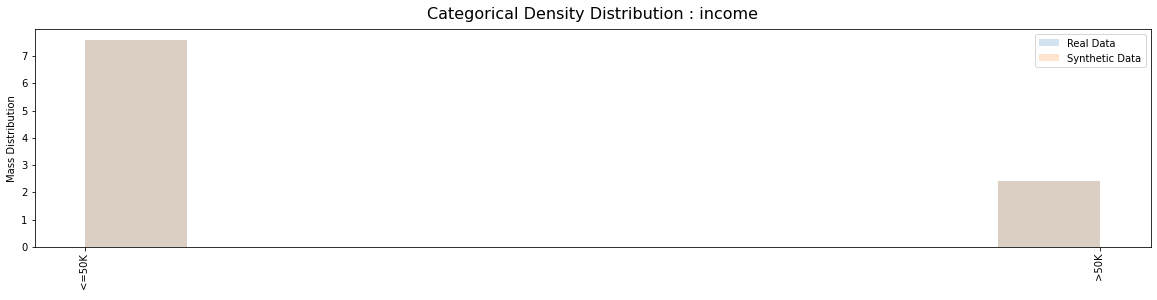

In [14]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

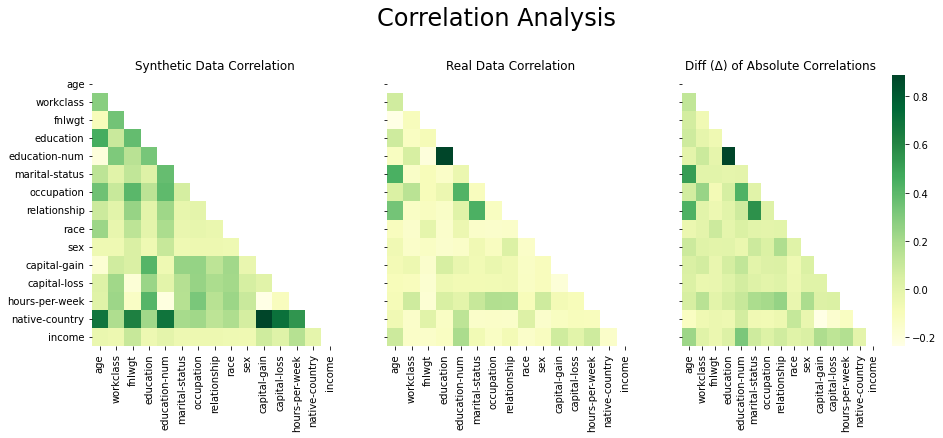

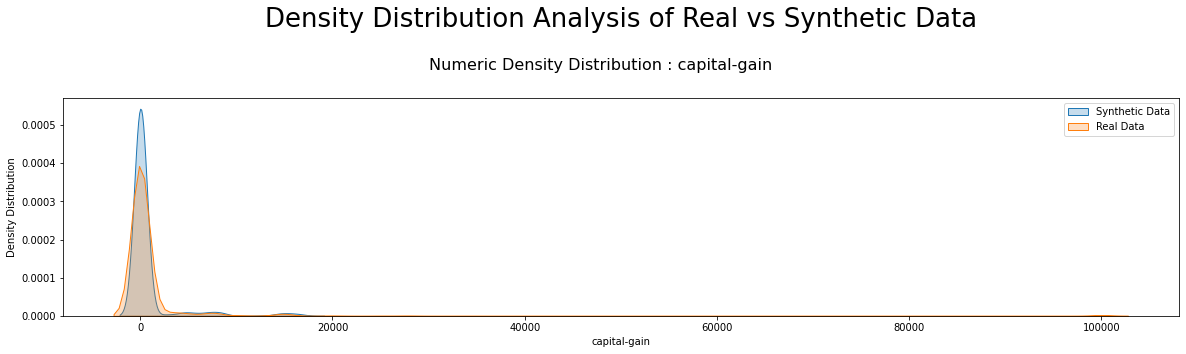

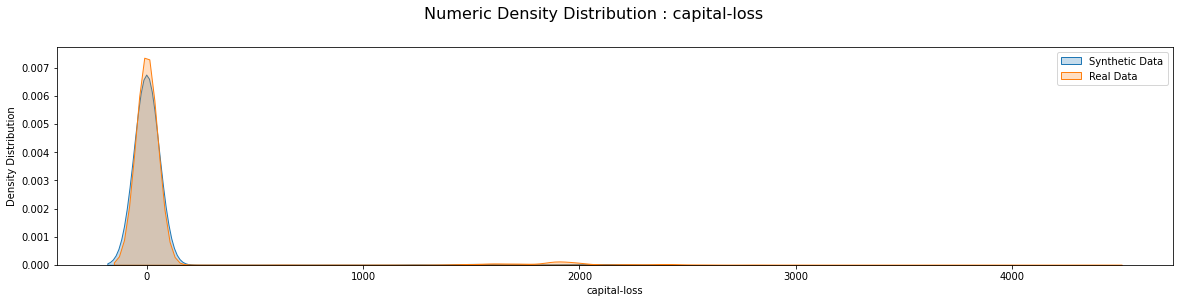

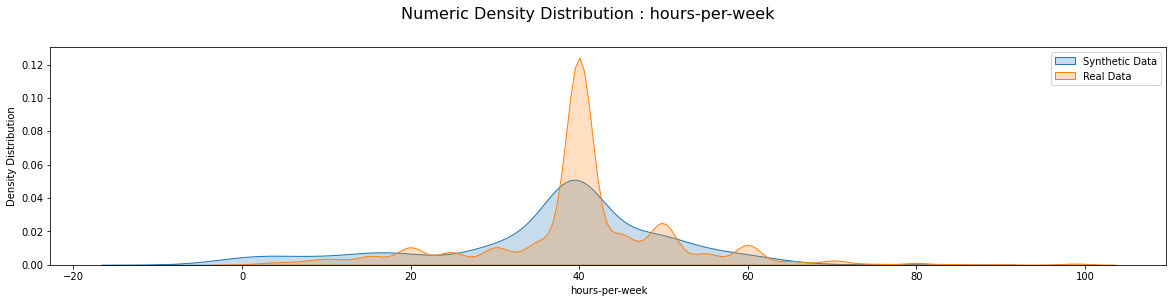

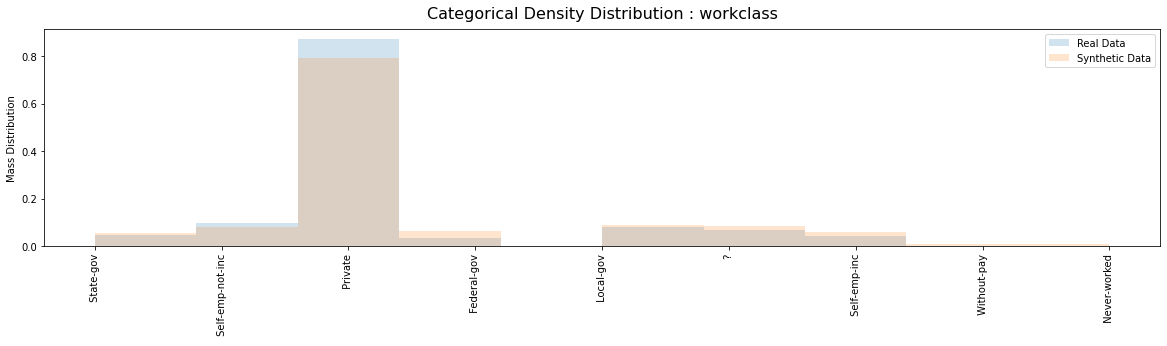

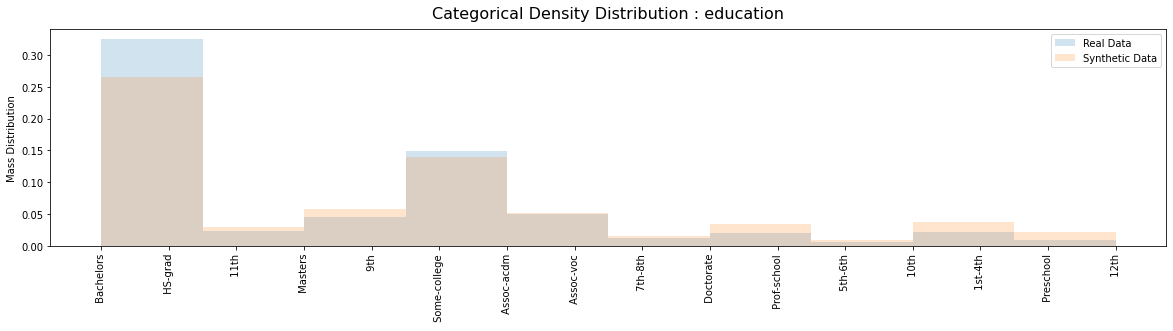

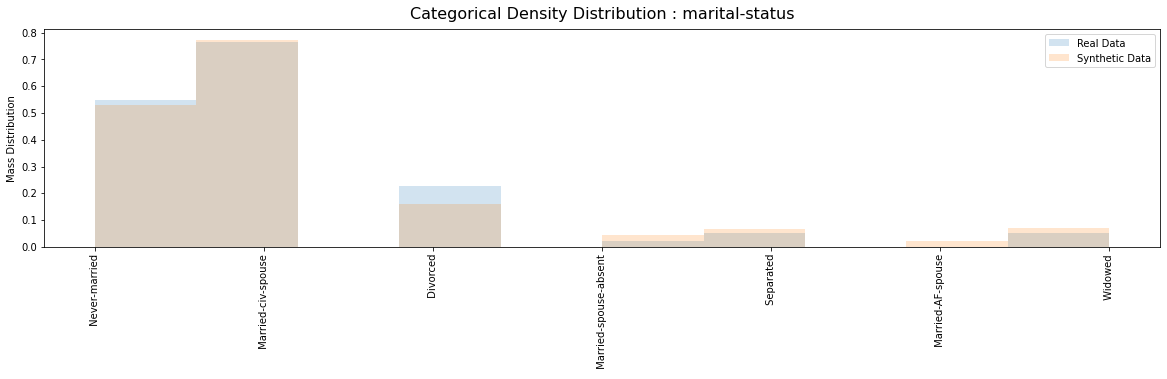

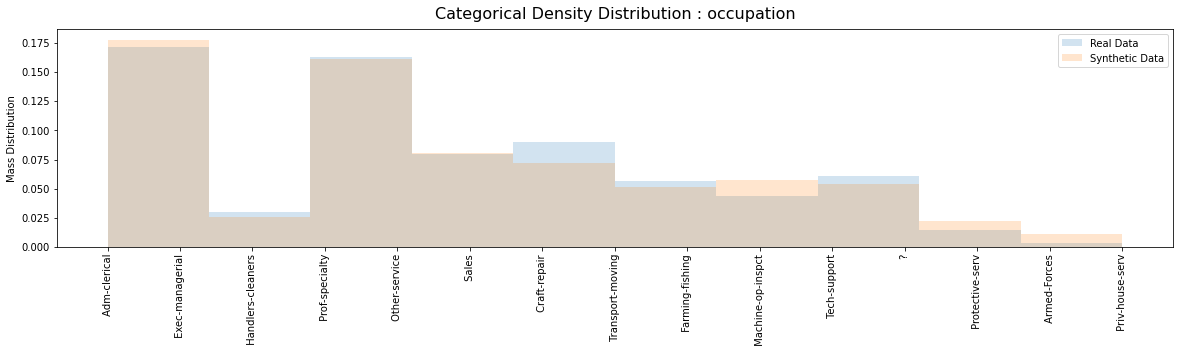

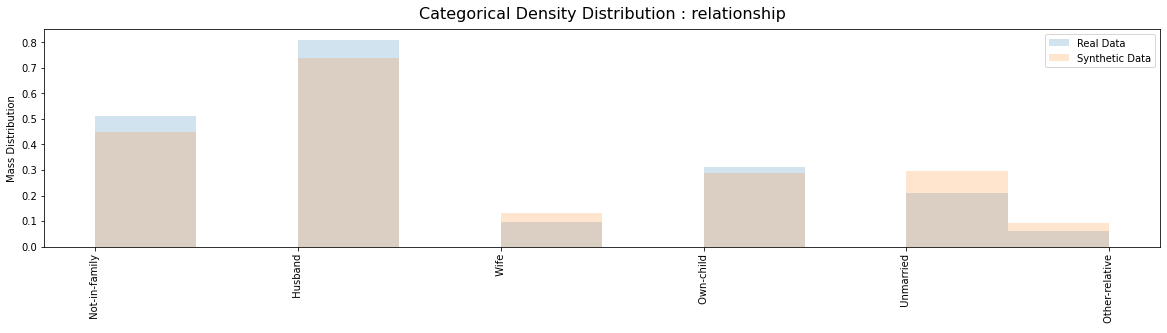

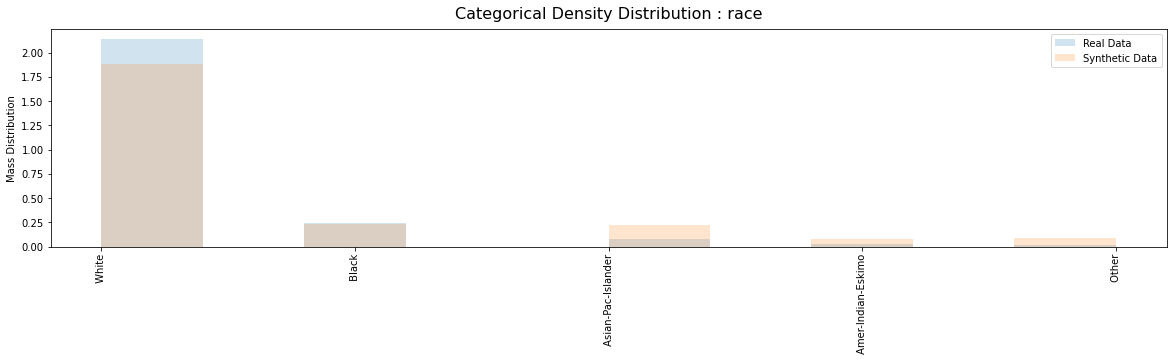

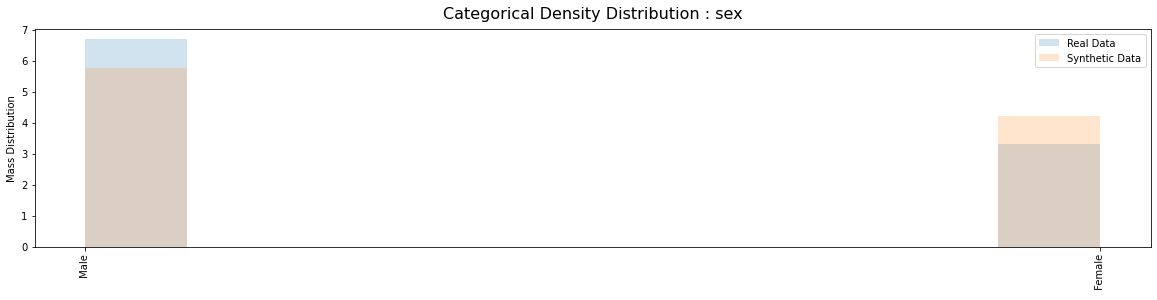

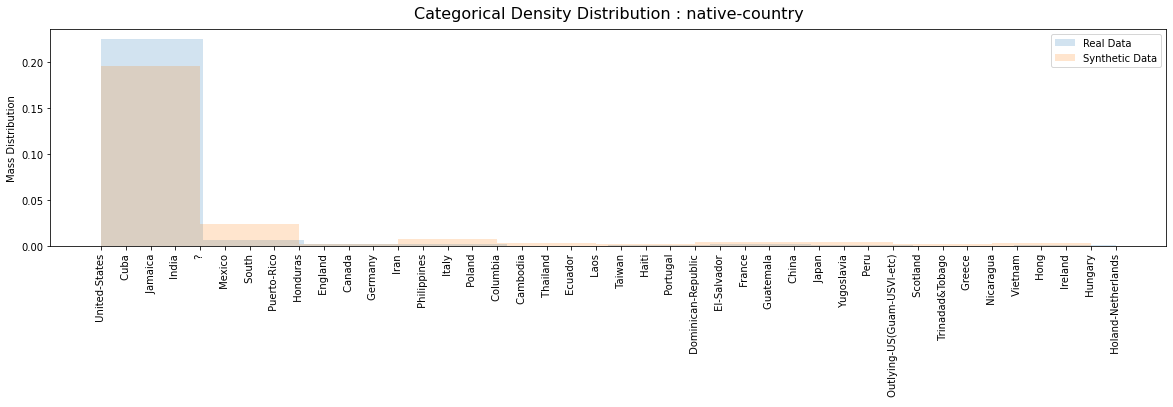

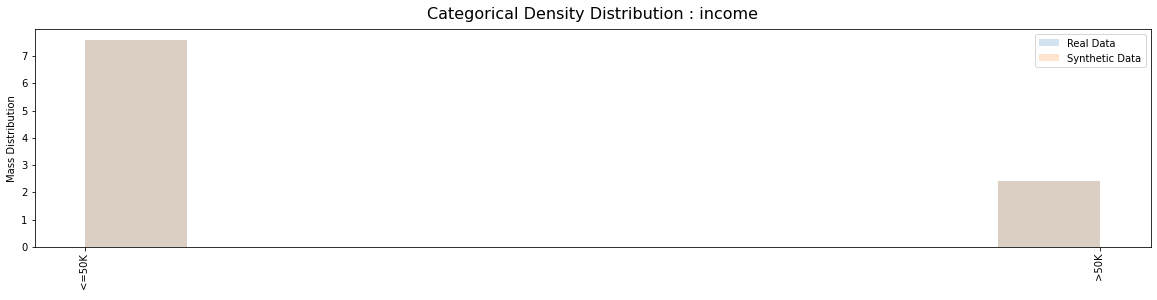

In [15]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

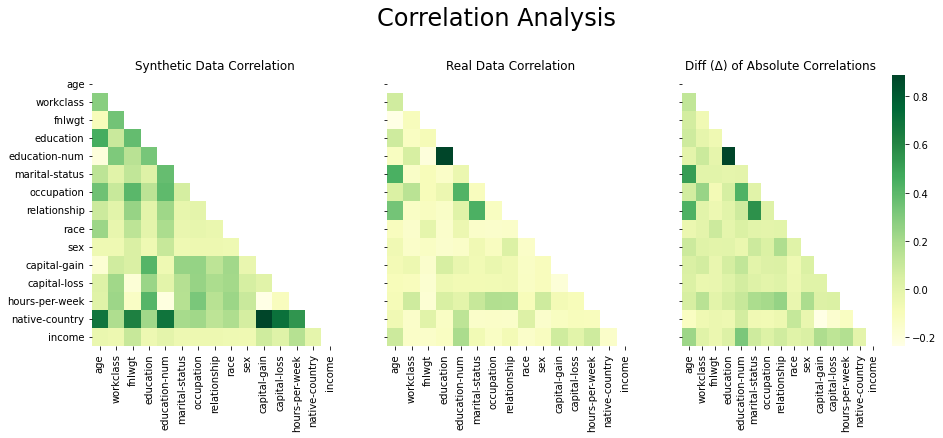

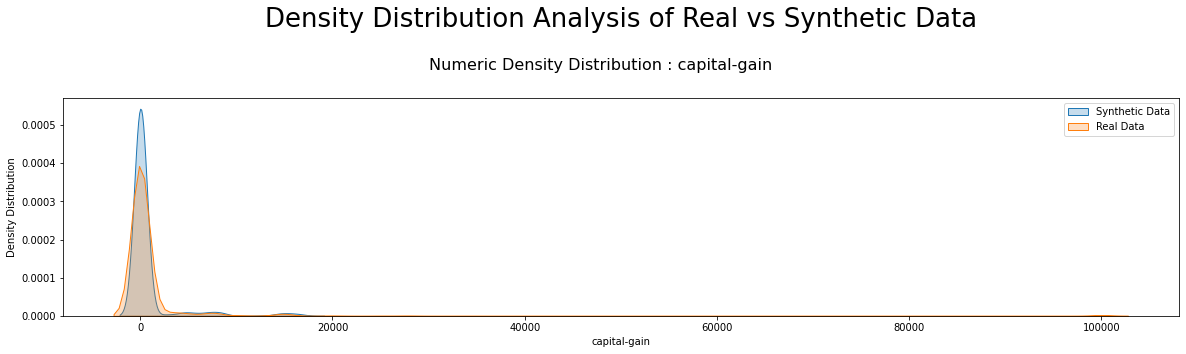

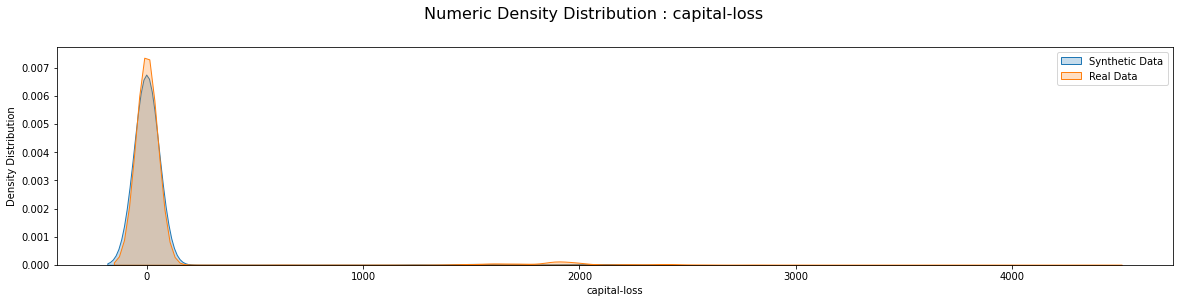

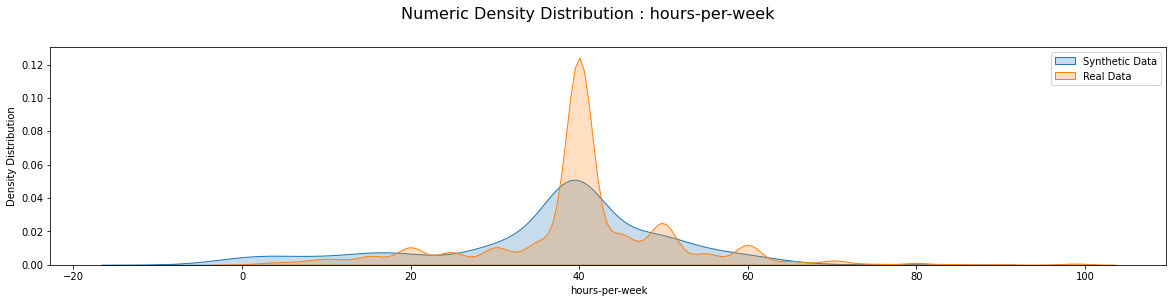

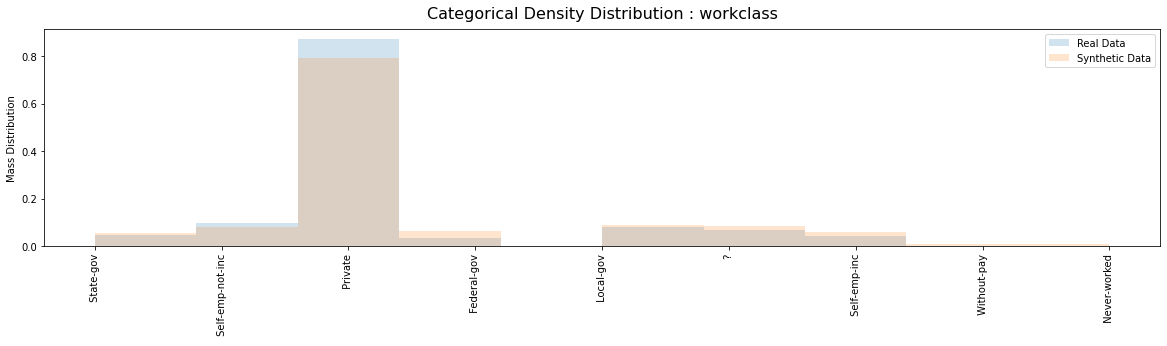

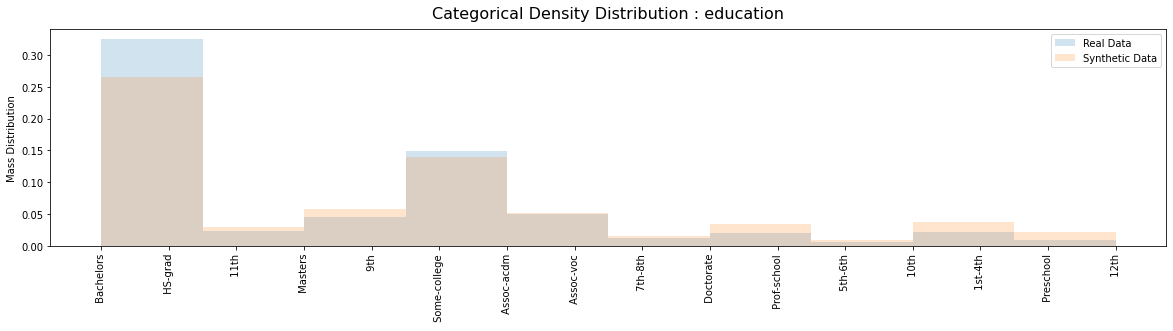

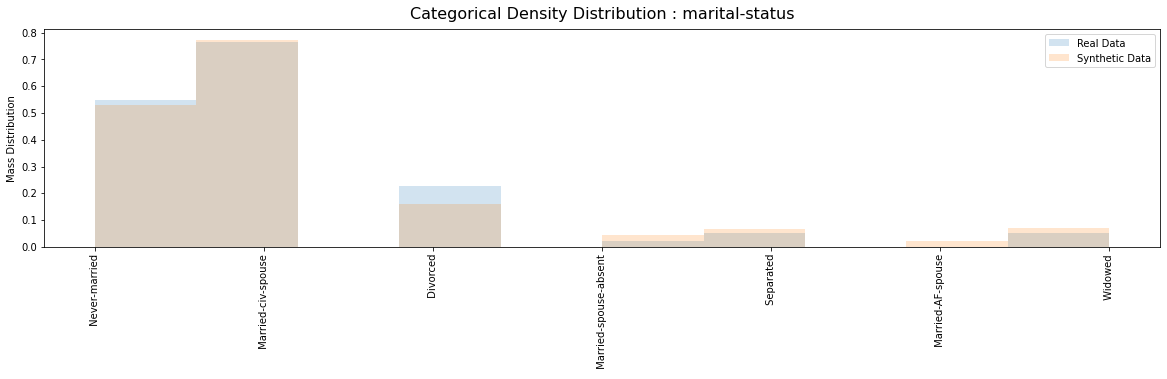

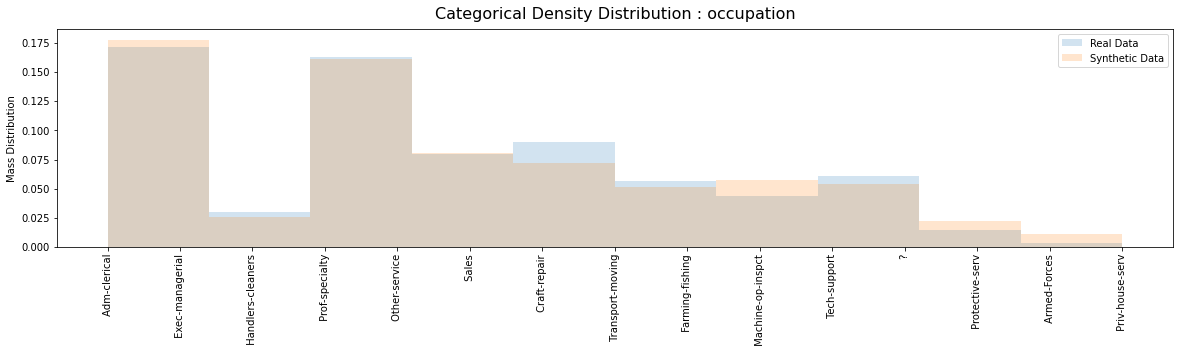

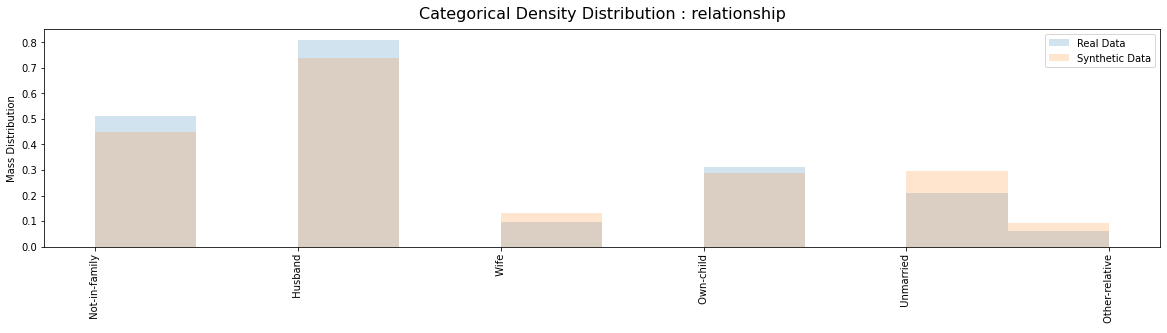

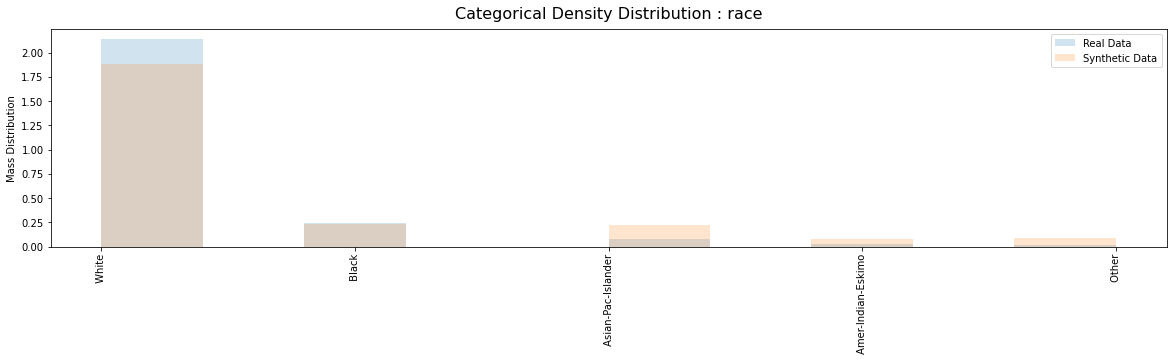

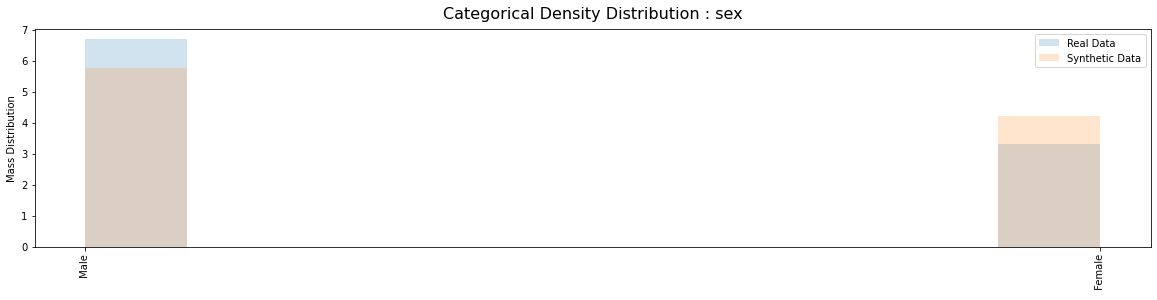

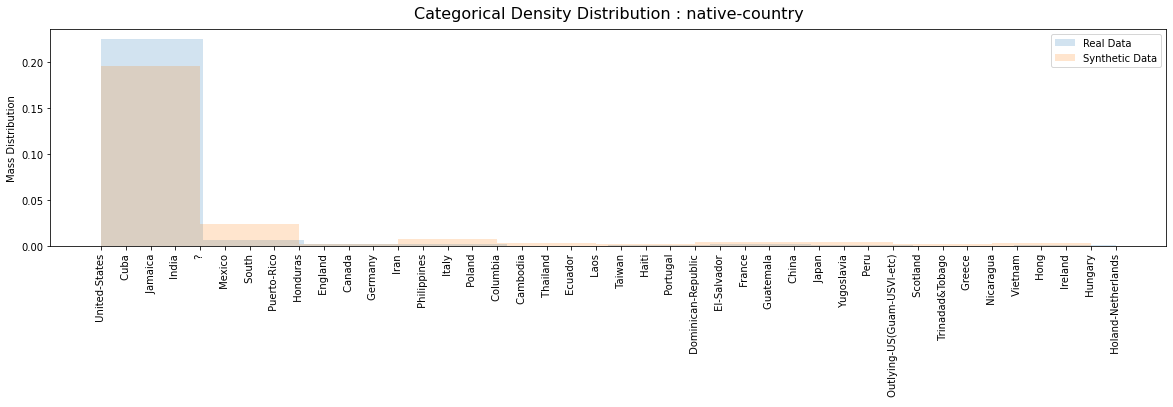

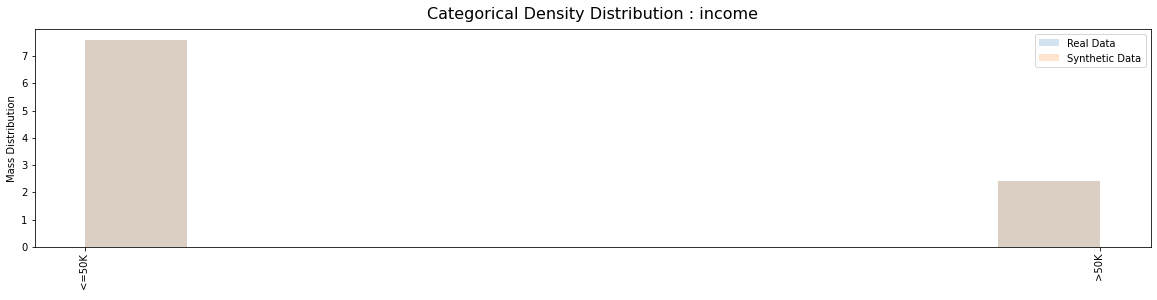

In [16]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [17]:
synth.save('C:/Users/Kaggle/wids/NormalAPI.pth')

#### 

## Adversarial API: Non-privately differentiable synthesizer

In [18]:
synth = TwinSynthesizer(batch_size=200,device='cpu')   ### cpu else cuda

In [19]:
synth.fit_adversarial(data=data,epochs=2,discrete_columns=discrete_columns,test_pct=0.33)

Generating train and test splits ...
TRAIN SAMPLES: n=21815
TEST SAMPLES: n=10746
Epoch: [0]  [  0/108]  eta: 0:00:06  loss_g: 2.1188 (2.1188)  loss_d: 0.0040 (0.0040)  loss: 2.1228 (2.1228)  time: 0.0625  data: 0.0000  max mem: 0
Epoch: [0]  [ 50/108]  eta: 0:00:02  loss_g: 1.3256 (1.7256)  loss_d: -0.7189 (-0.6261)  loss: 0.7642 (1.0996)  time: 0.0486  data: 0.0000  max mem: 0
Epoch: [0]  [100/108]  eta: 0:00:00  loss_g: 1.4844 (1.6485)  loss_d: -0.0994 (-0.4519)  loss: 1.4223 (1.1966)  time: 0.0469  data: 0.0000  max mem: 0
Epoch: [0]  [108/108]  eta: 0:00:00  loss_g: 1.3529 (1.6169)  loss_d: 0.1185 (-0.4086)  loss: 1.3539 (1.2083)  time: 0.0471  data: 0.0000  max mem: 0
Epoch: [0] Total time: 0:00:05
Epoch: [1]  [  0/108]  eta: 0:00:06  loss_g: 1.2670 (1.2670)  loss_d: 0.1600 (0.1600)  loss: 1.4270 (1.4270)  time: 0.0625  data: 0.0000  max mem: 0
Epoch: [1]  [ 50/108]  eta: 0:00:02  loss_g: 0.9831 (1.0199)  loss_d: 0.1110 (0.1260)  loss: 1.0837 (1.1459)  time: 0.0492  data: 0.0000 

In [20]:
sample = synth.sample_adversarial(data,1000)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [21]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

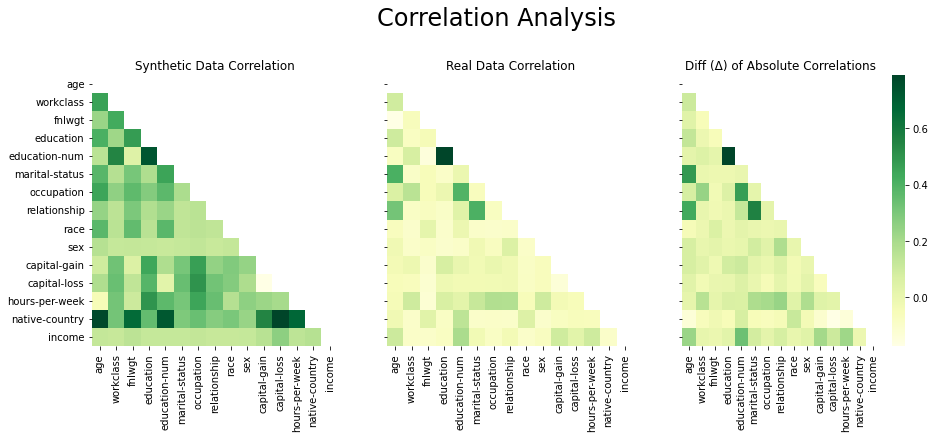

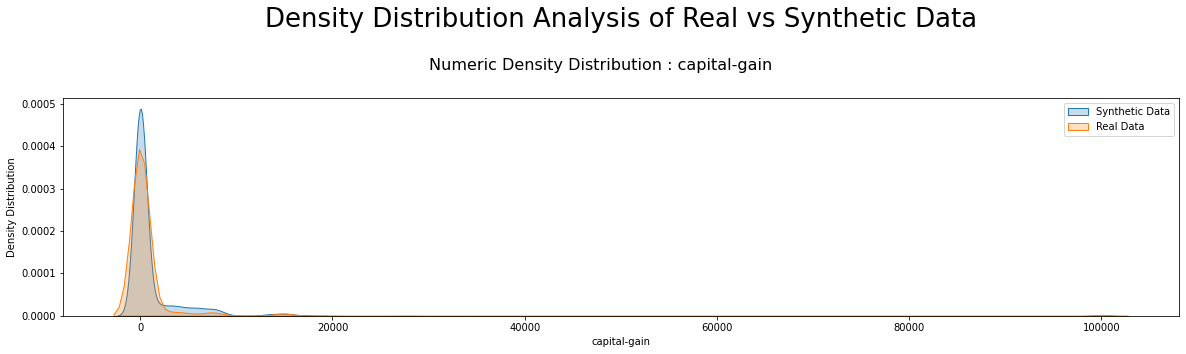

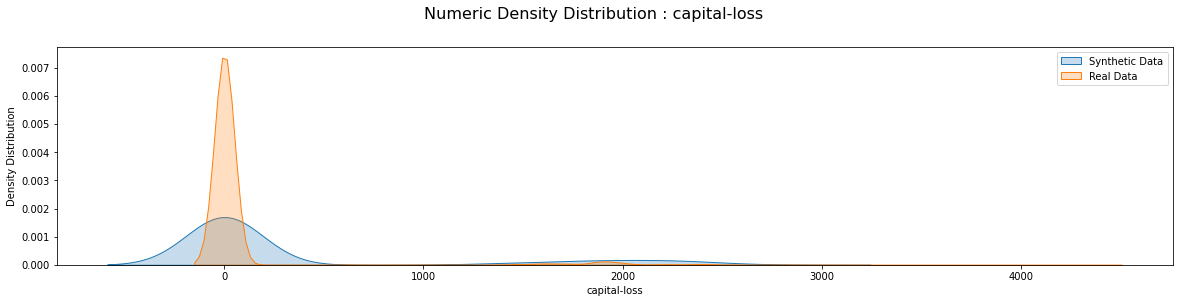

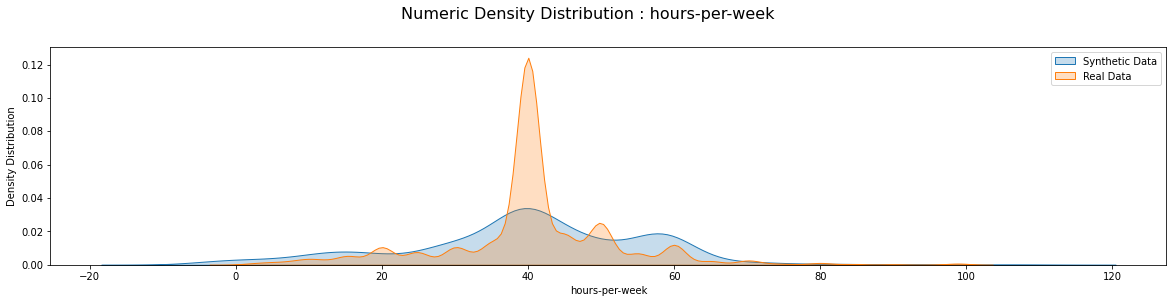

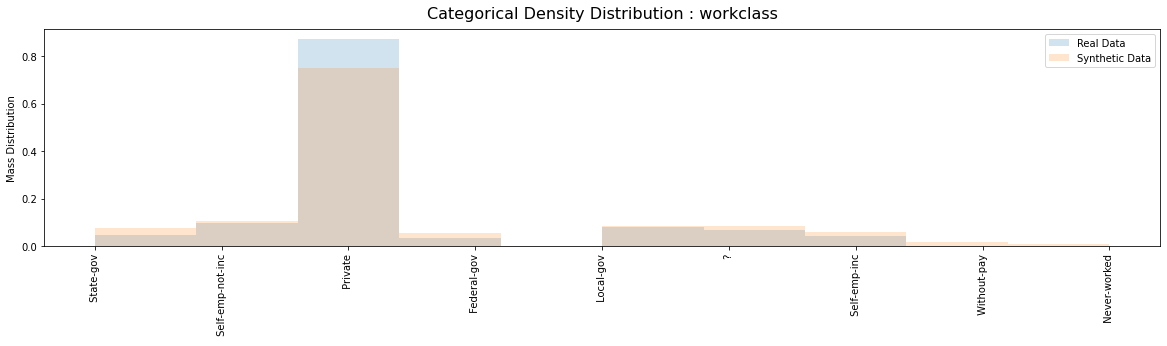

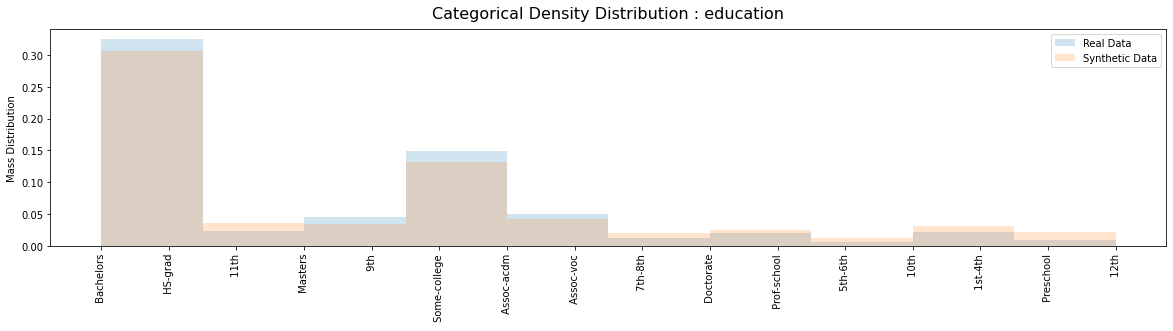

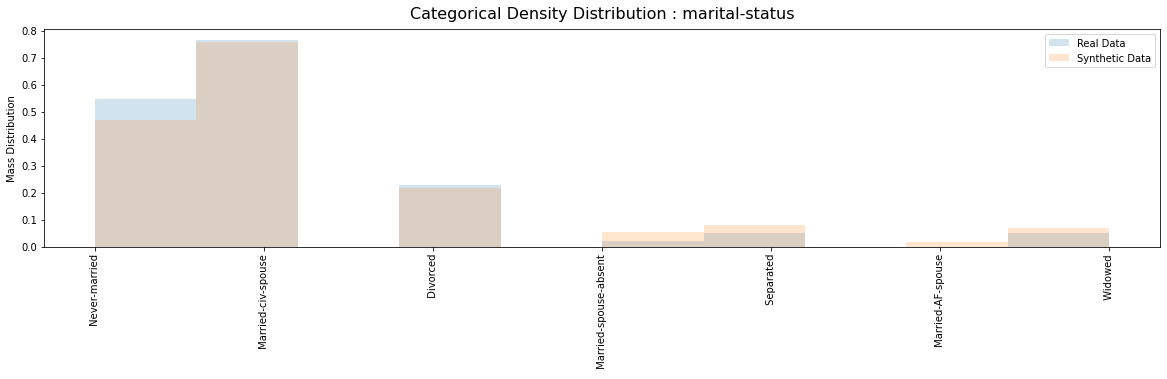

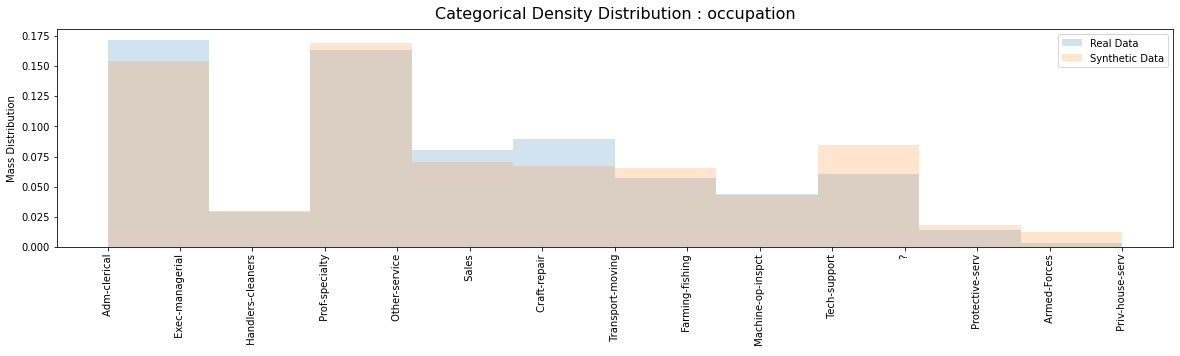

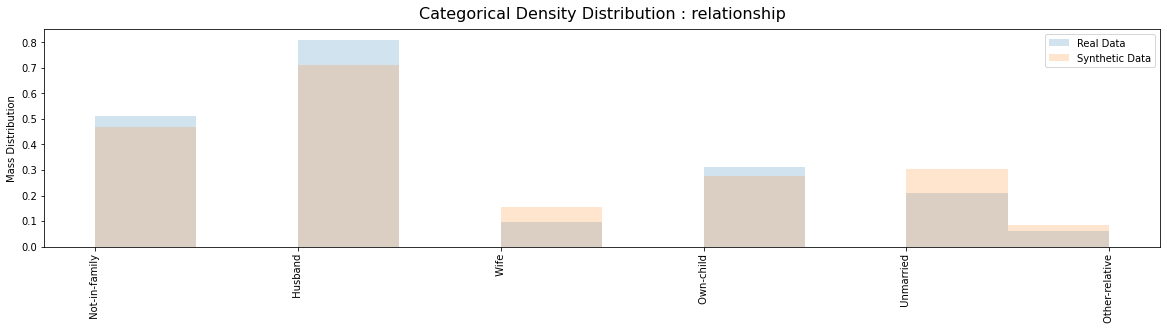

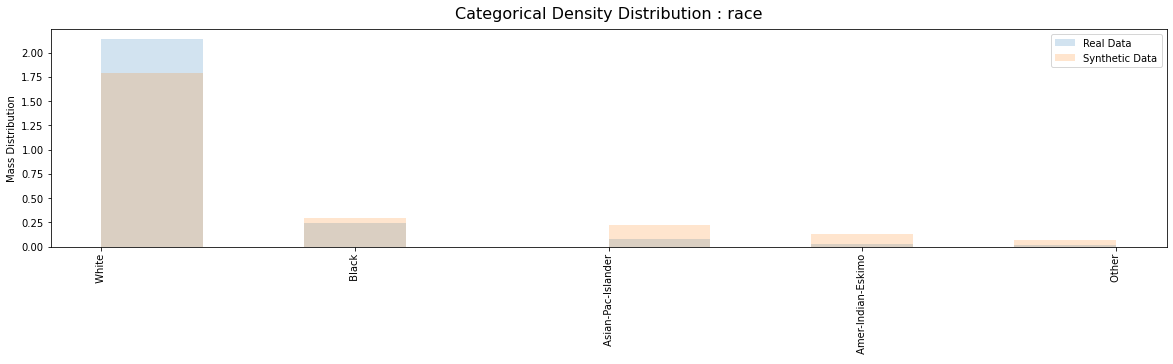

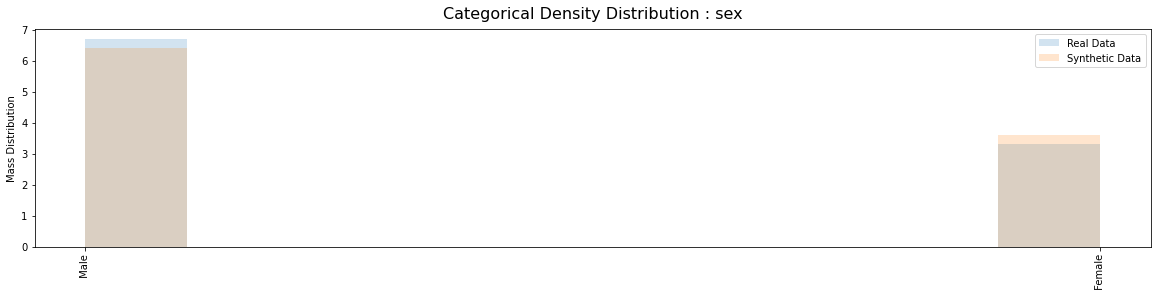

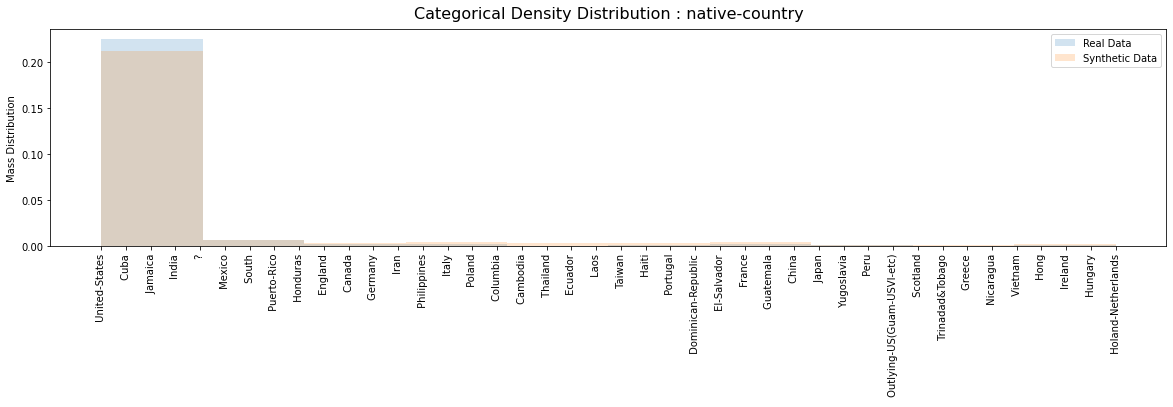

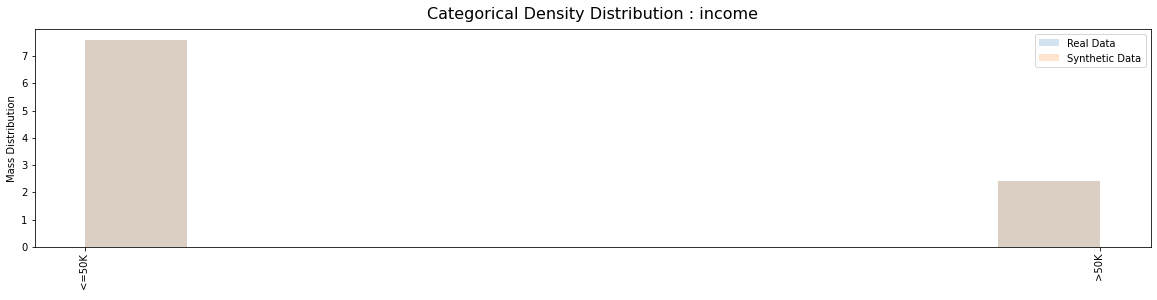

In [22]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

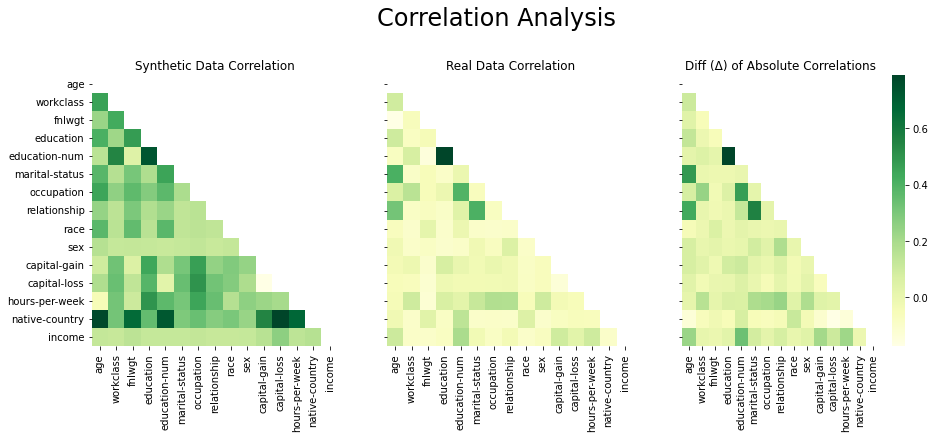

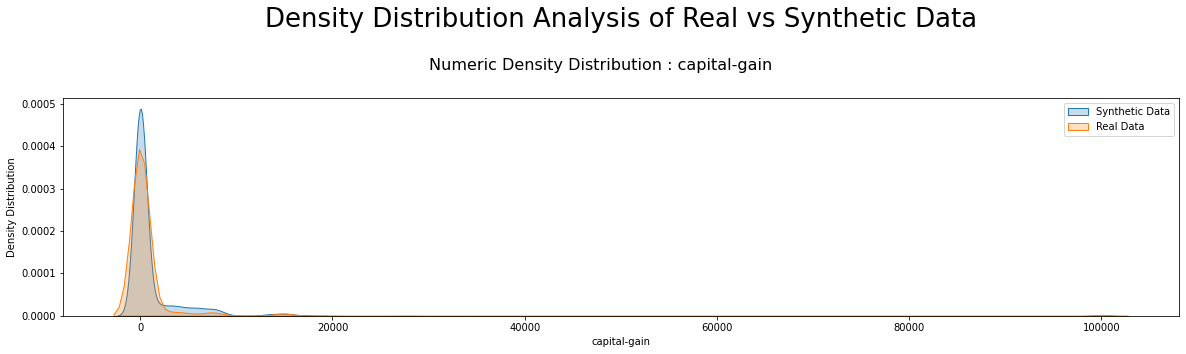

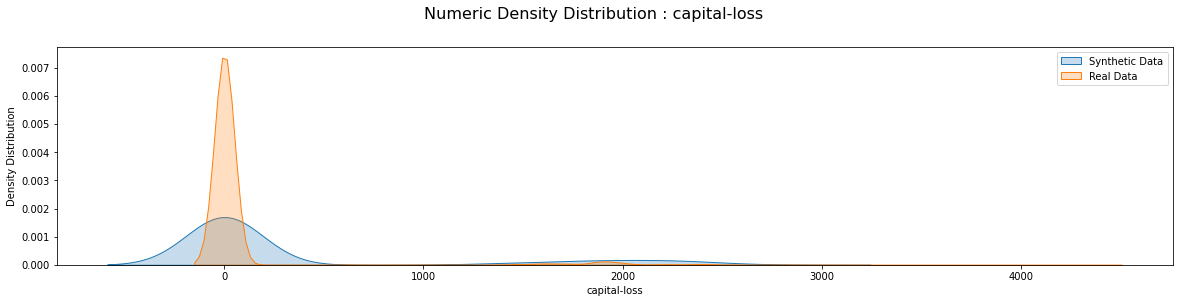

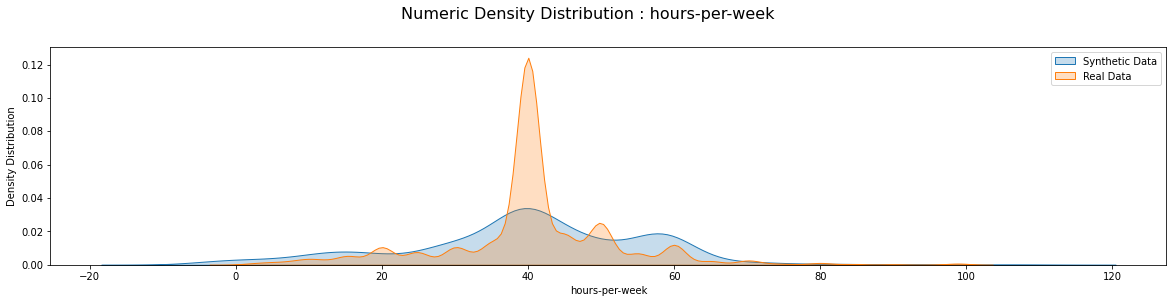

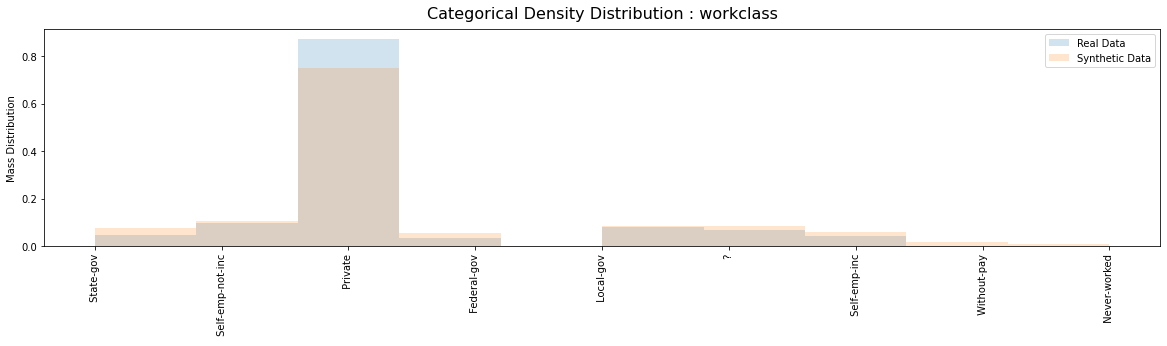

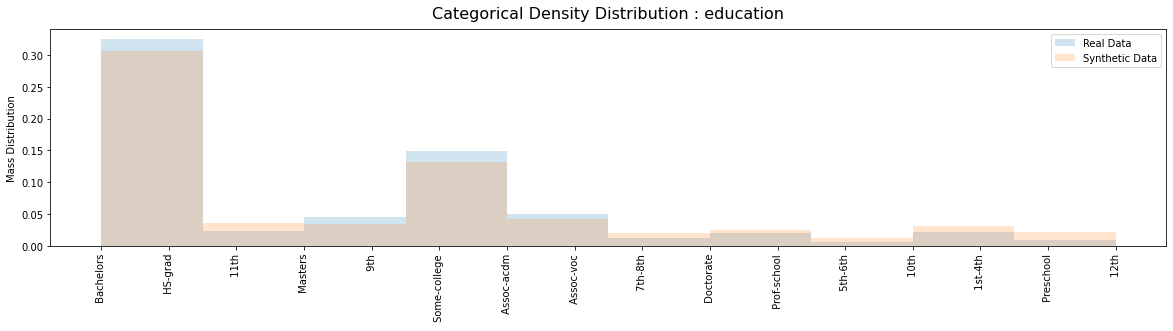

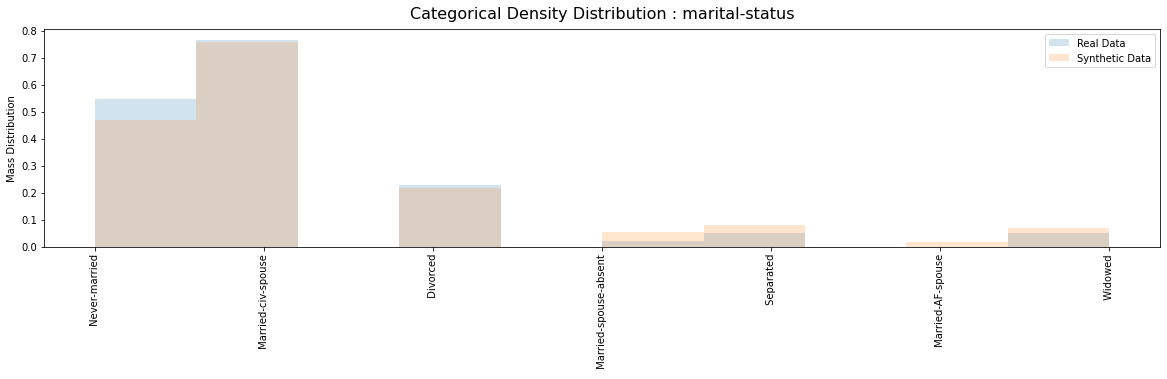

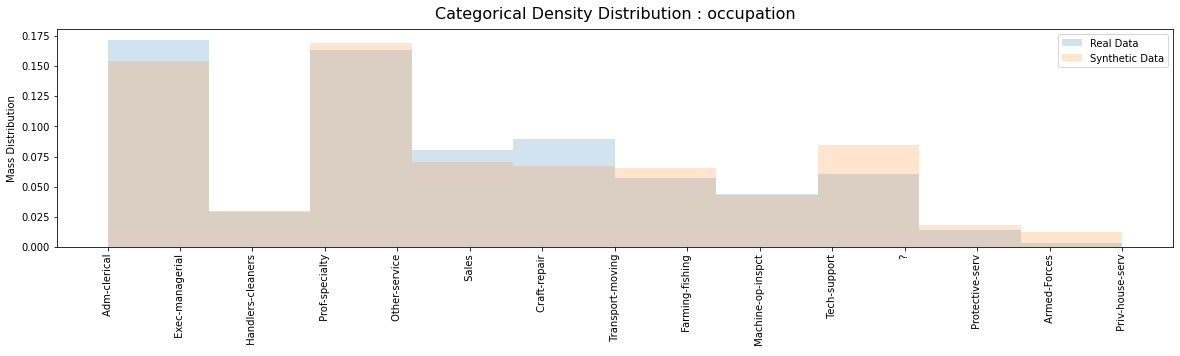

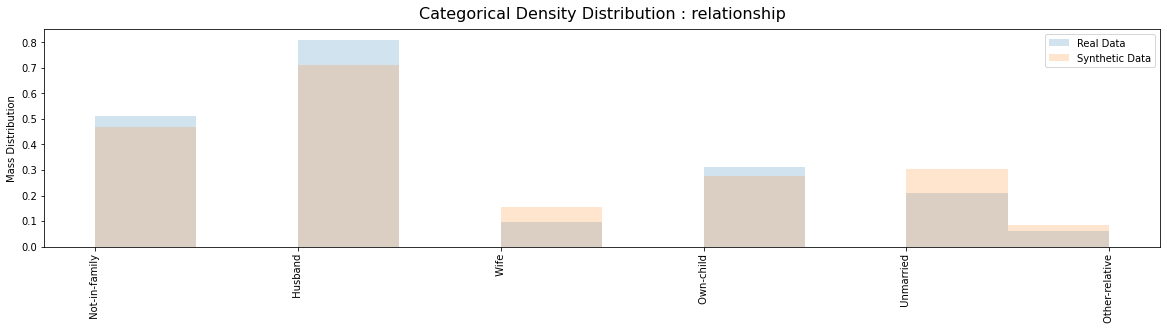

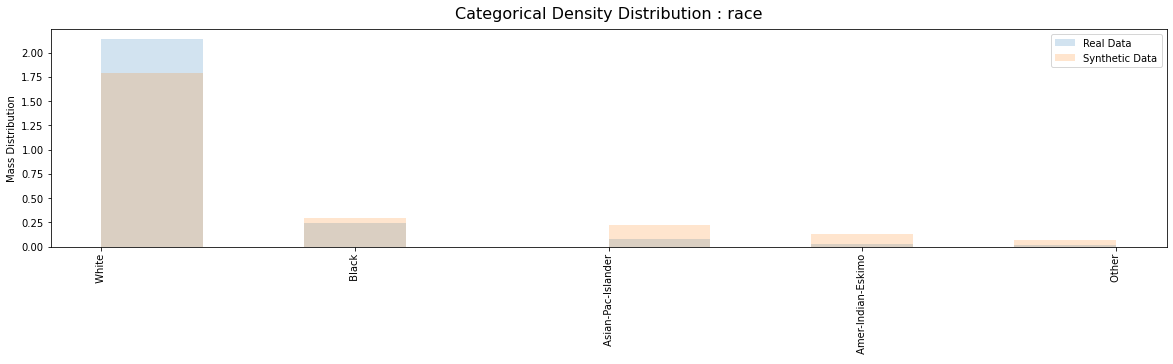

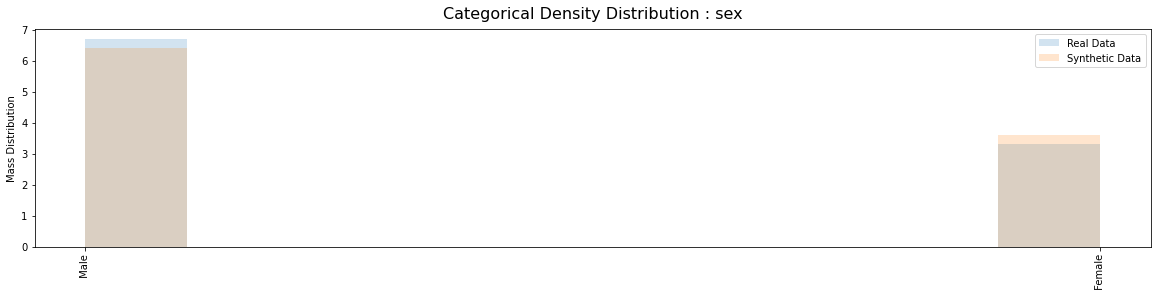

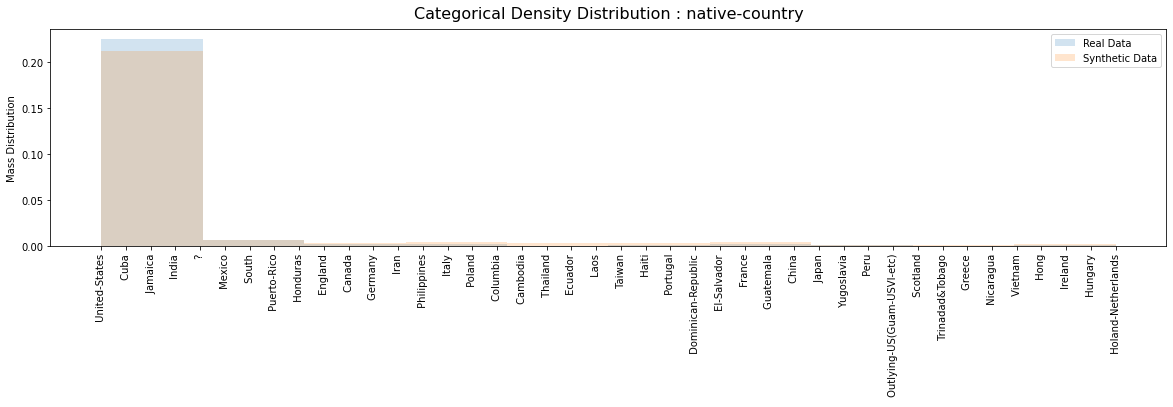

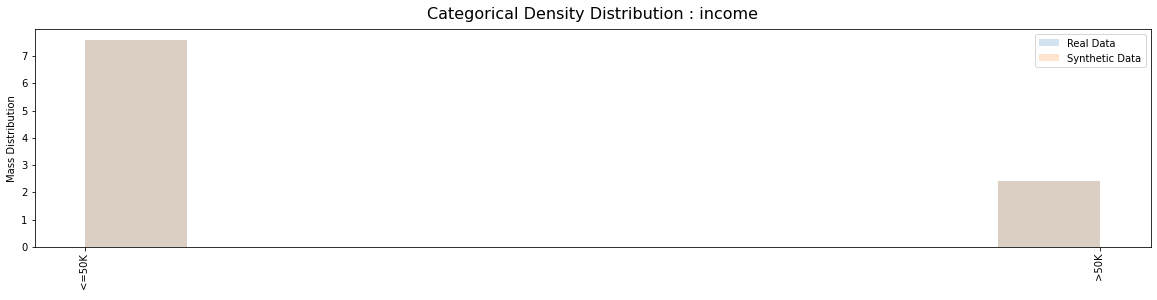

In [23]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

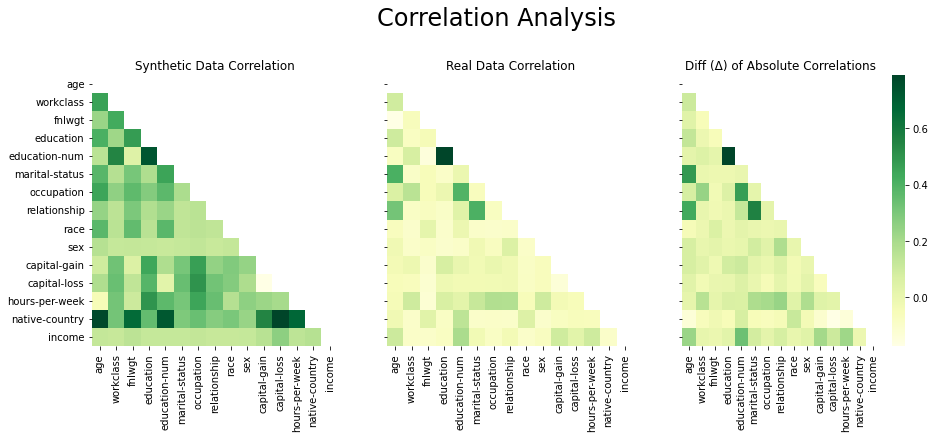

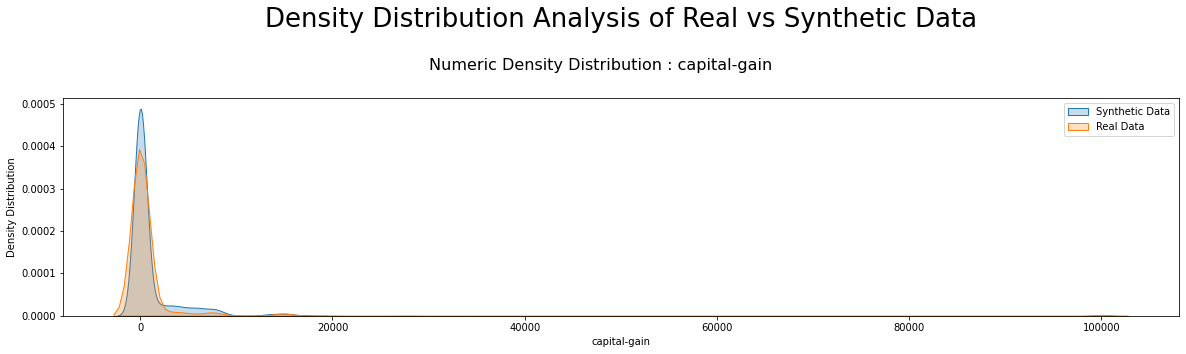

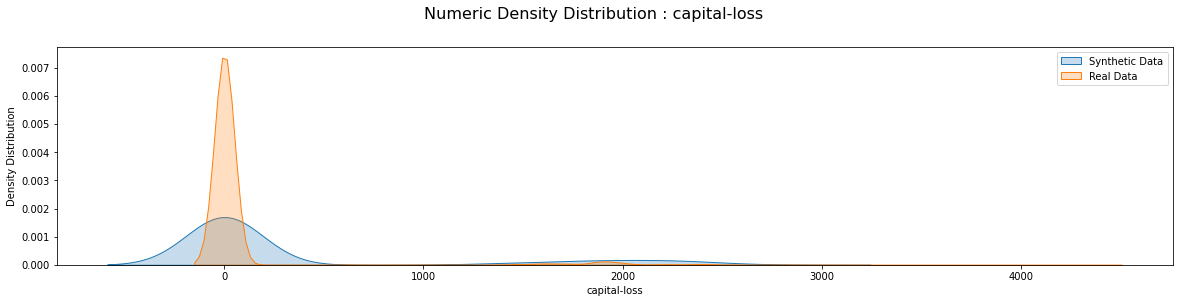

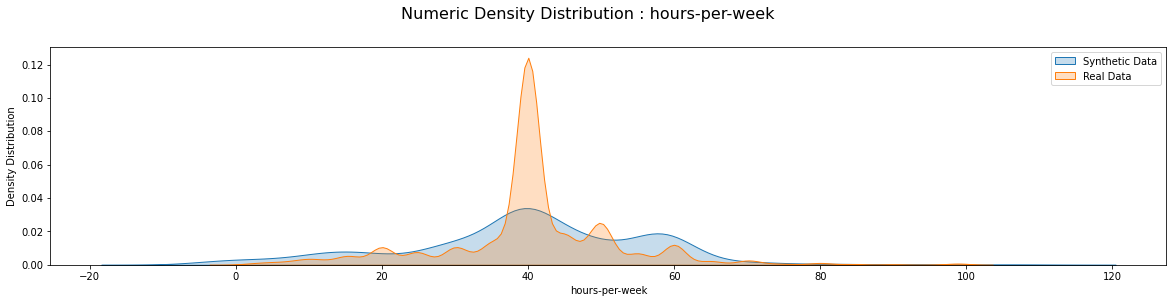

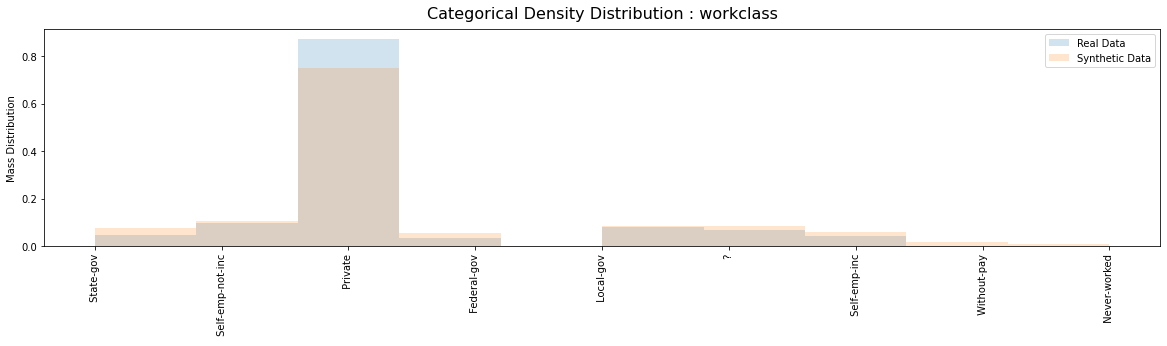

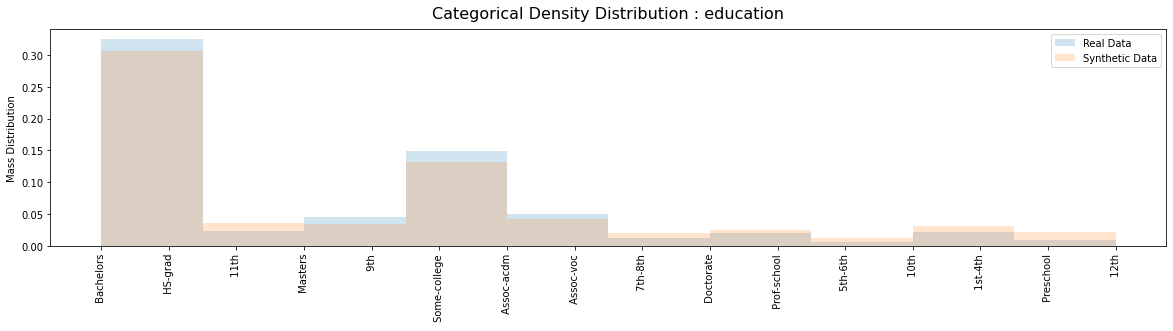

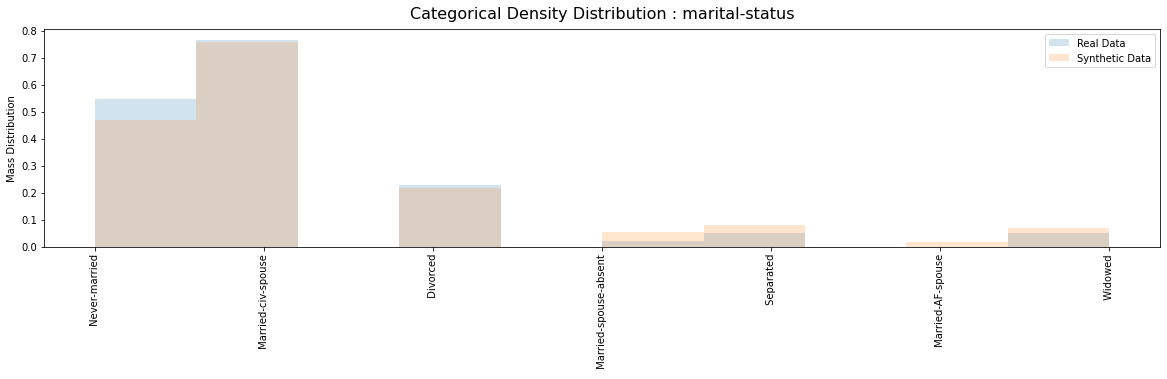

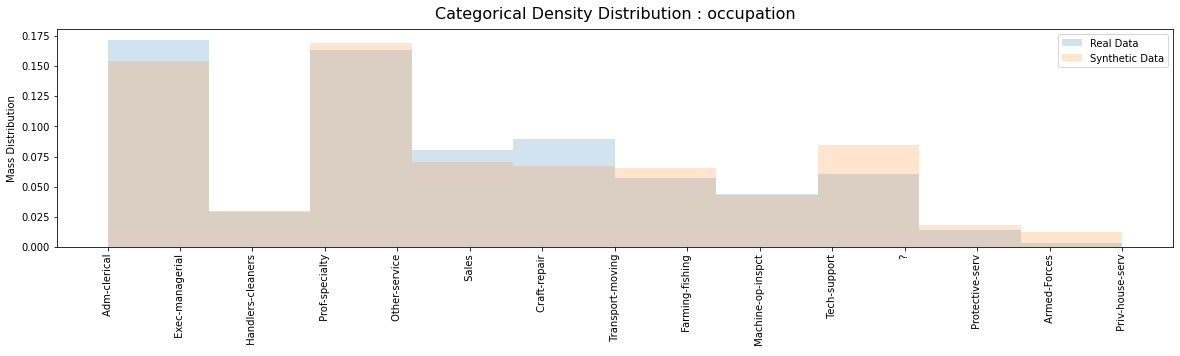

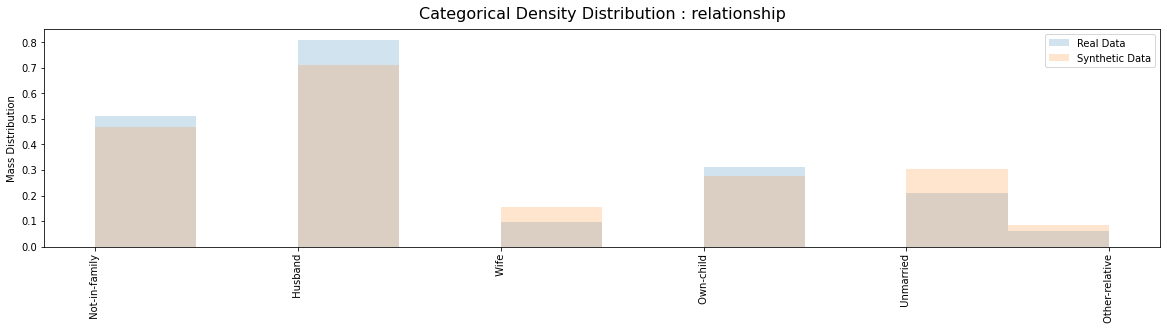

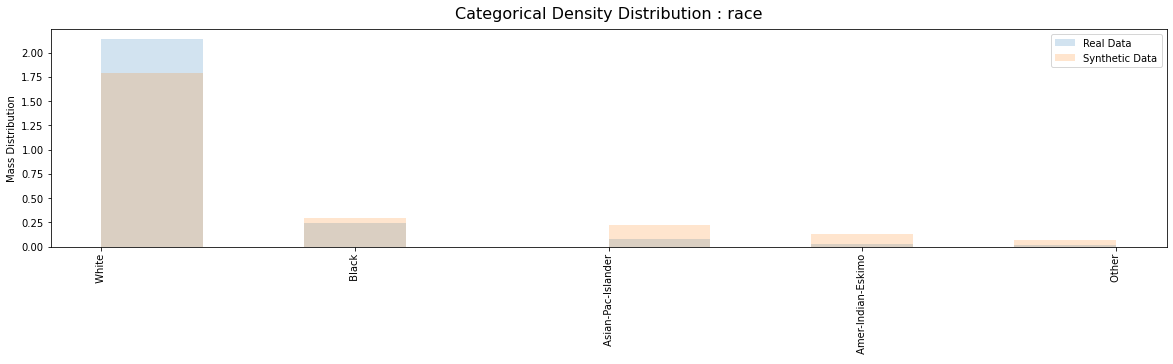

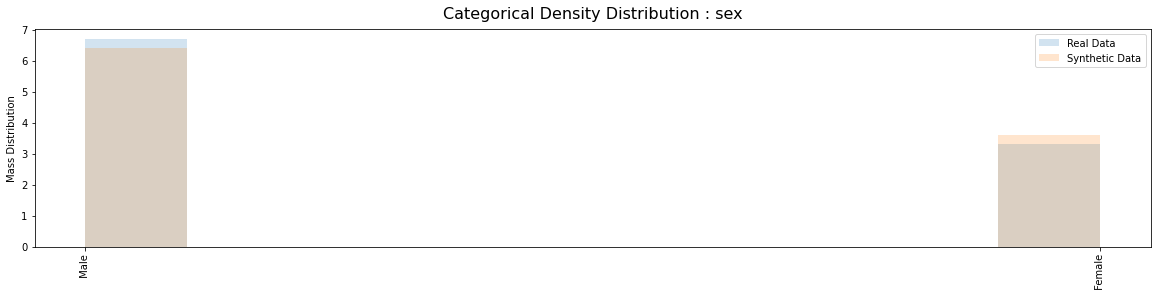

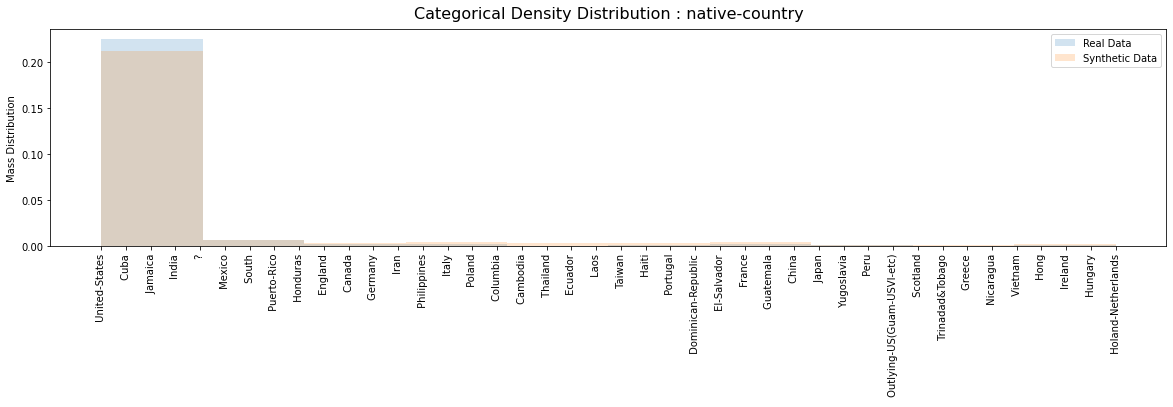

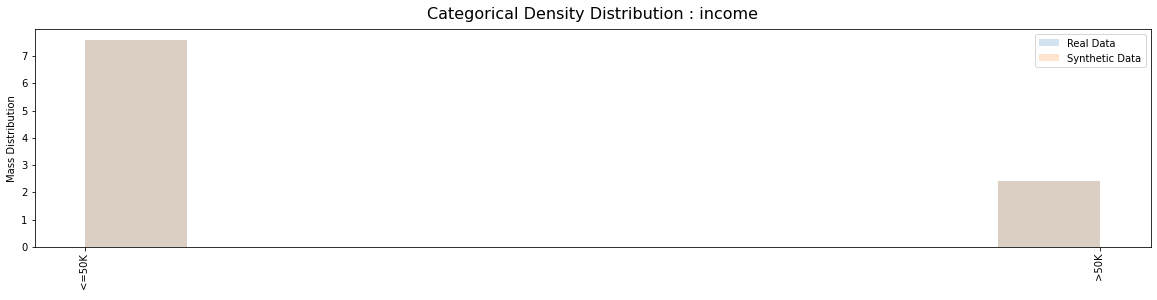

In [24]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [25]:
synth.save('C:/Users/Kaggle/wids/AdversarialAPI.pth')

#### 

## Normal API: Privately differentiable synthesizer

In [26]:
synth = PrivateTwinSynthesizer(epsilon=0.1,batch_size=64,device='cuda')   ### cpu else cuda

In [27]:
synth.fit(data=data,discrete_columns=discrete_columns,update_epsilon=1)

Iteration: [1]  [  0/159]  eta: 0:25:00  loss_t_fake: 0.6156 (0.6773)  loss_t_real: 0.7585 (0.7161)  time: 9.3780  data: 0.0000  max mem: 59
Iteration: [1]  [ 50/159]  eta: 0:01:10  loss_t_fake: 0.0077 (0.0951)  loss_t_real: 0.0547 (0.2918)  time: 0.4665  data: 0.0000  max mem: 59
Iteration: [1]  [100/159]  eta: 0:00:33  loss_t_fake: 0.0017 (0.0499)  loss_t_real: 0.0102 (0.1591)  time: 0.4659  data: 0.0000  max mem: 59
Iteration: [1]  [150/159]  eta: 0:00:05  loss_t_fake: 0.0006 (0.0337)  loss_t_real: 0.0037 (0.1084)  time: 0.4672  data: 0.0000  max mem: 59
Iteration: [1]  [159/159]  eta: 0:00:00  loss_t_fake: 0.0006 (0.0319)  loss_t_real: 0.0034 (0.1025)  time: 0.4683  data: 0.0000  max mem: 59
Iteration: [1] Total time: 0:01:23
Iteration: [1]  [0/4]  eta: 0:00:02  loss_t_fake: 0.0006 (0.0319)  loss_t_real: 0.0034 (0.1025)  loss_s: 0.6975 (0.6964)  time: 0.4575  data: 0.0000  max mem: 60
Iteration: [1]  [1/4]  eta: 0:00:01  loss_t_fake: 0.0006 (0.0319)  loss_t_real: 0.0034 (0.1025)  l

Iteration: [3]  [150/159]  eta: 0:00:04  loss_t_fake: 0.0001 (0.0010)  loss_t_real: 0.0005 (0.0008)  time: 0.4630  data: 0.0000  max mem: 60
Iteration: [3]  [159/159]  eta: 0:00:00  loss_t_fake: 0.0001 (0.0009)  loss_t_real: 0.0004 (0.0008)  time: 0.4650  data: 0.0000  max mem: 60
Iteration: [3] Total time: 0:01:14
Iteration: [3]  [0/4]  eta: 0:00:00  loss_t_fake: 0.0001 (0.0009)  loss_t_real: 0.0004 (0.0008)  loss_s: 1.6806 (1.6209)  time: 0.1093  data: 0.0000  max mem: 60
Iteration: [3]  [1/4]  eta: 0:00:00  loss_t_fake: 0.0001 (0.0009)  loss_t_real: 0.0004 (0.0008)  loss_s: 1.4501 (1.5277)  time: 0.1113  data: 0.0000  max mem: 60
Iteration: [3]  [2/4]  eta: 0:00:00  loss_t_fake: 0.0001 (0.0009)  loss_t_real: 0.0004 (0.0008)  loss_s: 1.4501 (1.4564)  time: 0.1158  data: 0.0000  max mem: 60
Iteration: [3]  [3/4]  eta: 0:00:00  loss_t_fake: 0.0001 (0.0009)  loss_t_real: 0.0004 (0.0008)  loss_s: 1.3392 (1.3455)  time: 0.1151  data: 0.0000  max mem: 60
Iteration: [3]  [4/4]  eta: 0:00:00

Iteration: [5]  [1/4]  eta: 0:00:00  loss_t_fake: 0.0000 (0.0246)  loss_t_real: 0.0006 (0.0010)  loss_s: 1.3898 (1.3947)  time: 0.1112  data: 0.0000  max mem: 60
Iteration: [5]  [2/4]  eta: 0:00:00  loss_t_fake: 0.0000 (0.0246)  loss_t_real: 0.0006 (0.0010)  loss_s: 1.2972 (1.2897)  time: 0.1097  data: 0.0000  max mem: 60
Iteration: [5]  [3/4]  eta: 0:00:00  loss_t_fake: 0.0000 (0.0246)  loss_t_real: 0.0006 (0.0010)  loss_s: 1.1361 (1.1949)  time: 0.1122  data: 0.0000  max mem: 60
Iteration: [5]  [4/4]  eta: 0:00:00  loss_t_fake: 0.0000 (0.0246)  loss_t_real: 0.0006 (0.0010)  loss_s: 0.9593 (1.1043)  time: 0.1130  data: 0.0000  max mem: 60
Iteration: [5] Total time: 0:00:00
Iteration: [5]  [  0/507]  eta: 0:00:00  loss_t_fake: 0.0000 (0.0246)  loss_t_real: 0.0006 (0.0010)  loss_s: 0.9593 (1.1043)  loss_g: 0.4751 (0.4751)  time: 0.0000  data: 0.0000  max mem: 60
Iteration: [5]  [ 50/507]  eta: 0:00:00  loss_t_fake: 0.0000 (0.0246)  loss_t_real: 0.0006 (0.0010)  loss_s: 0.9593 (1.1043)  

In [28]:
sample = synth.sample(1000)

In [29]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

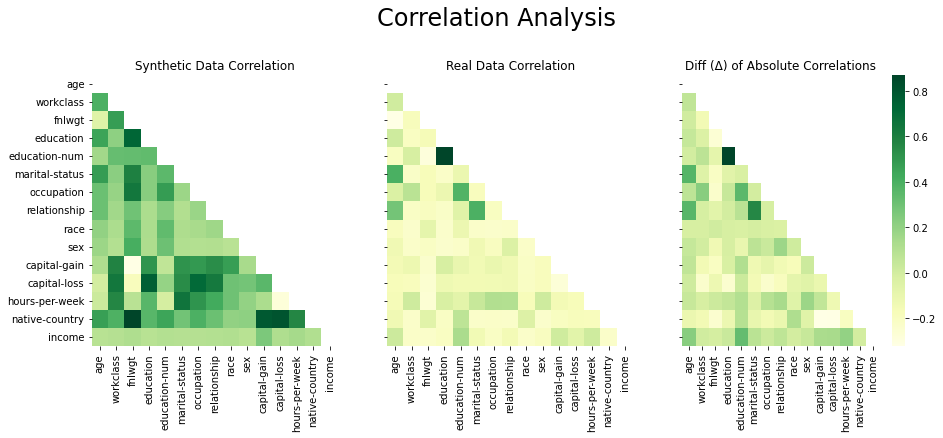

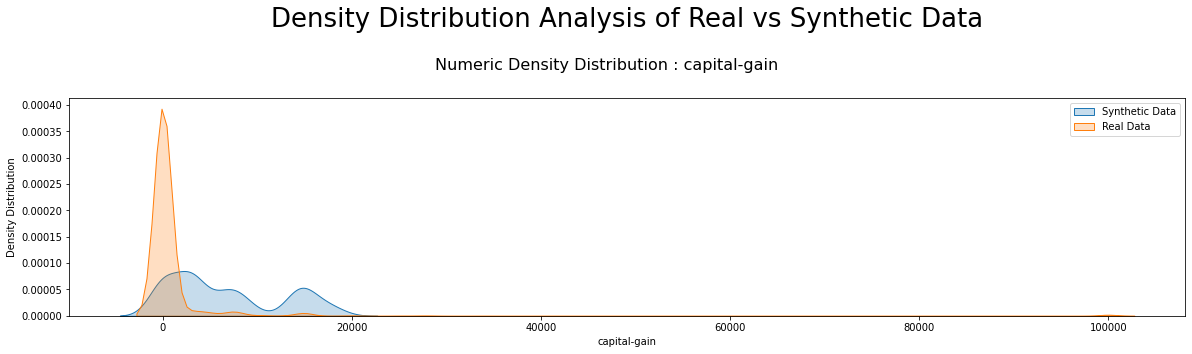

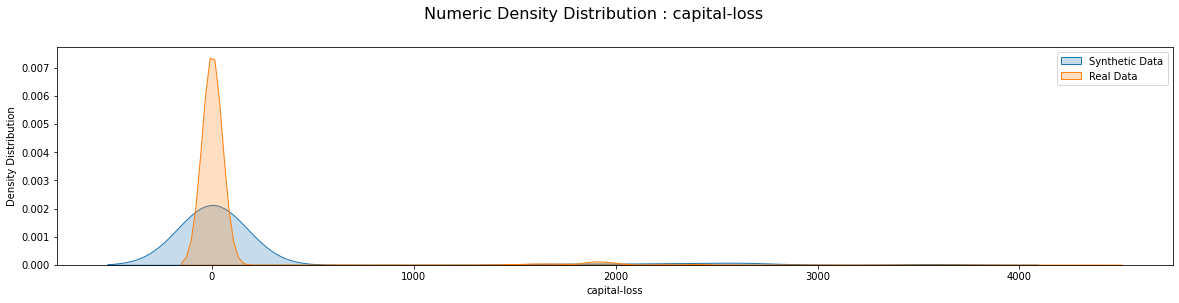

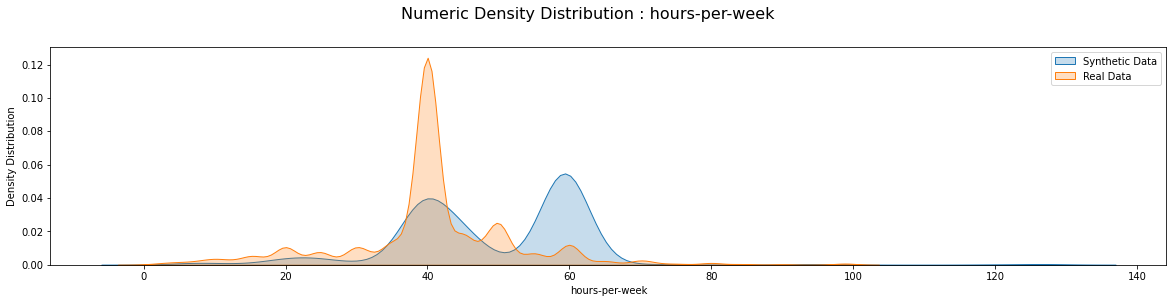

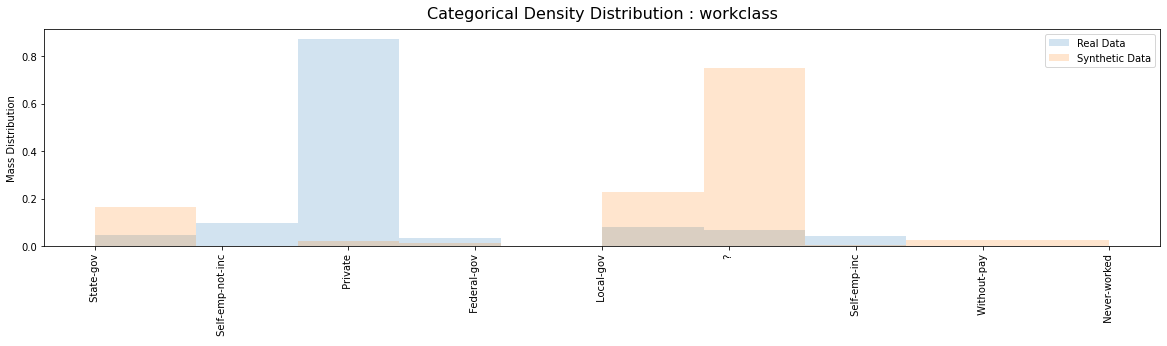

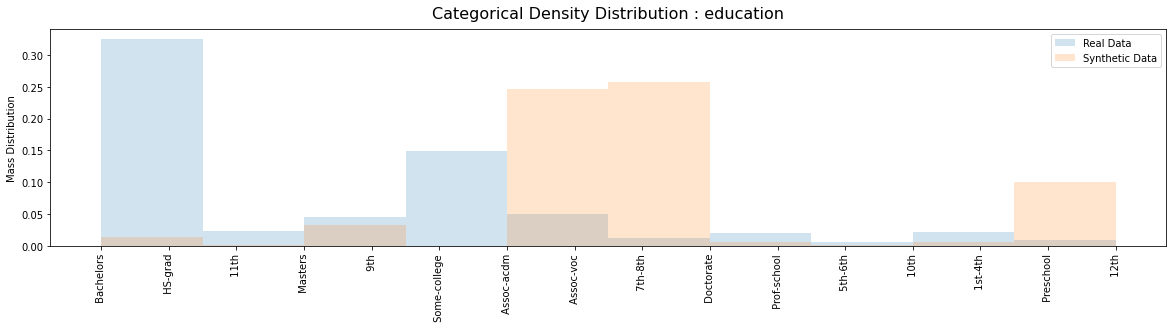

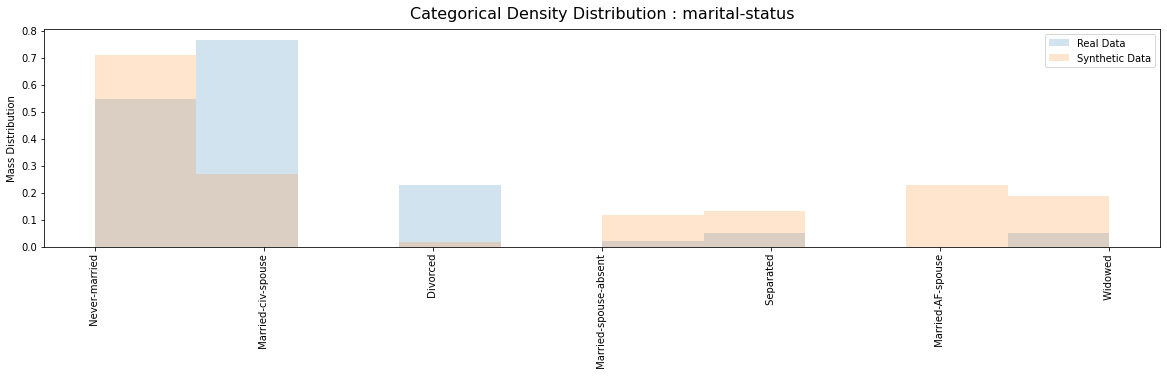

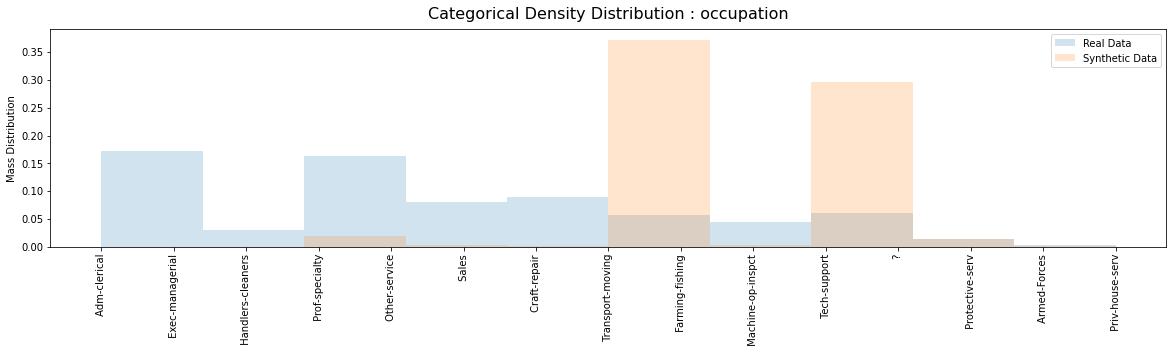

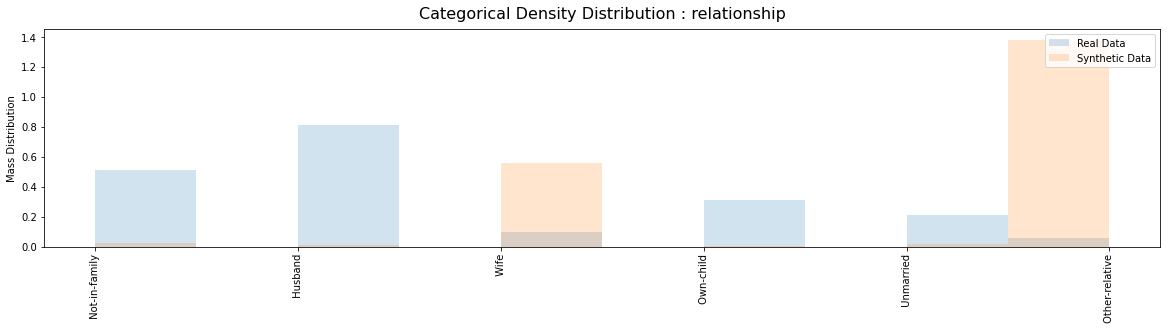

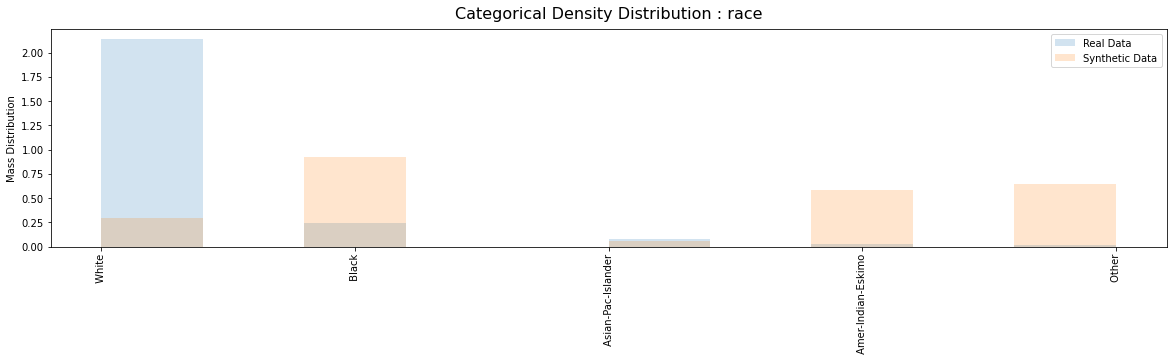

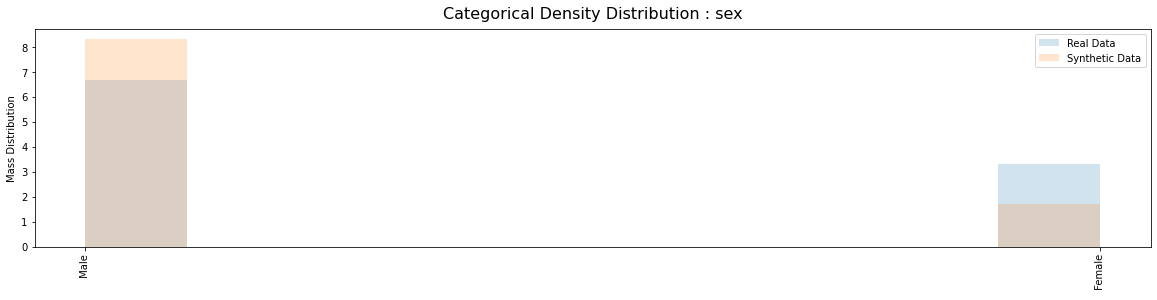

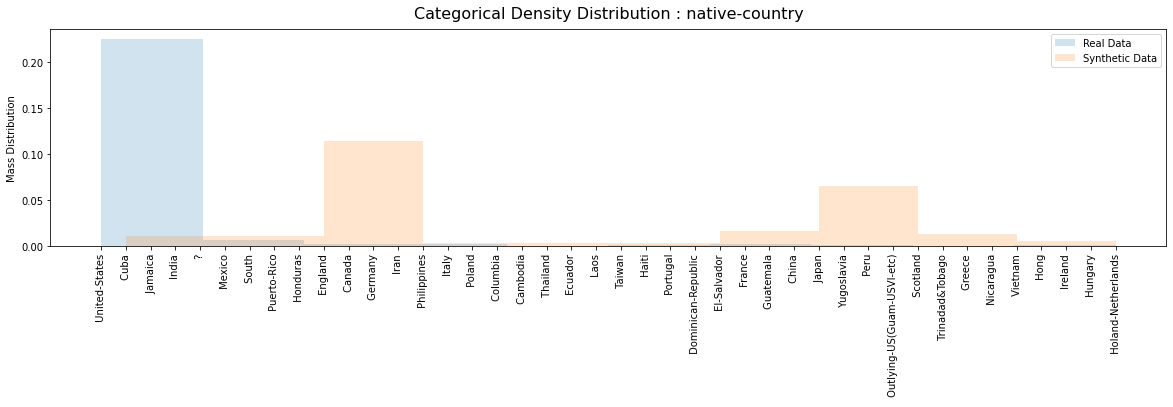

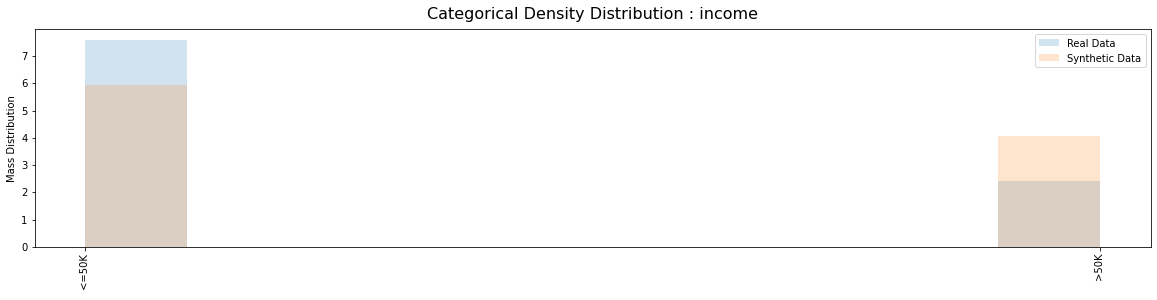

In [30]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

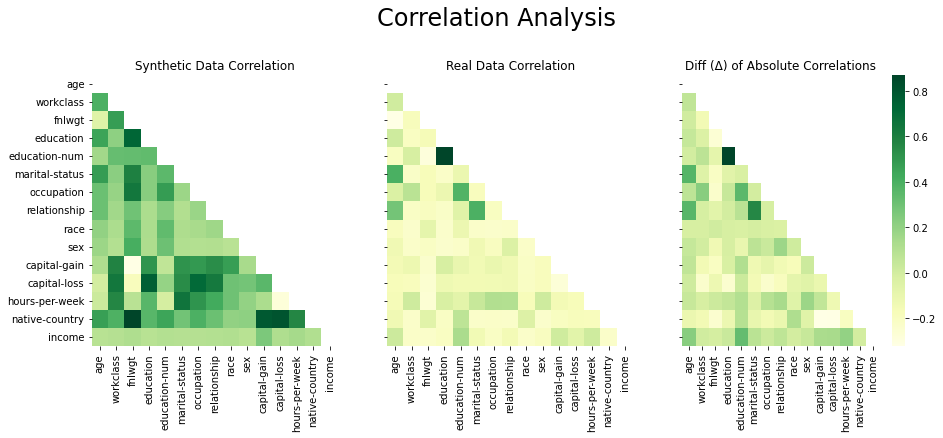

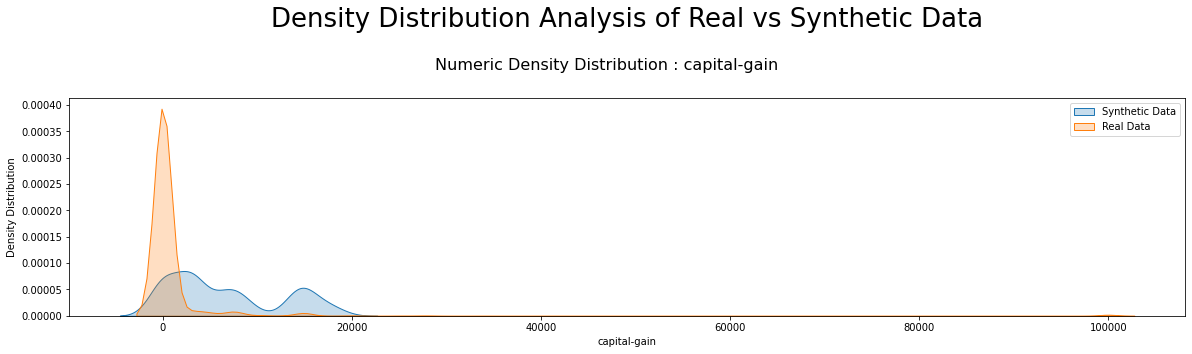

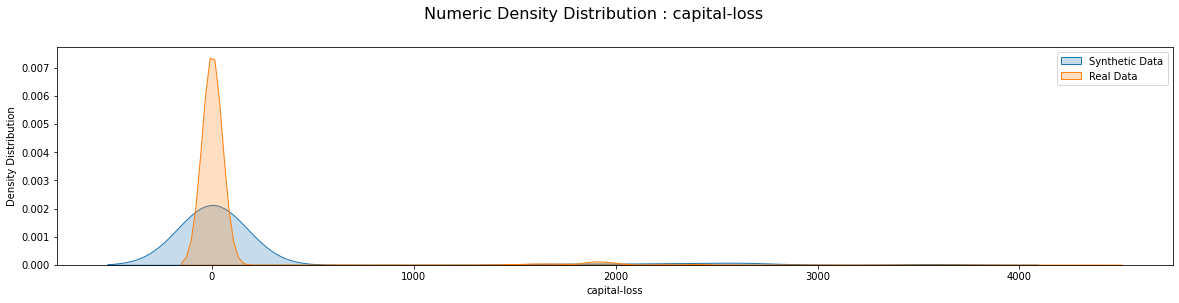

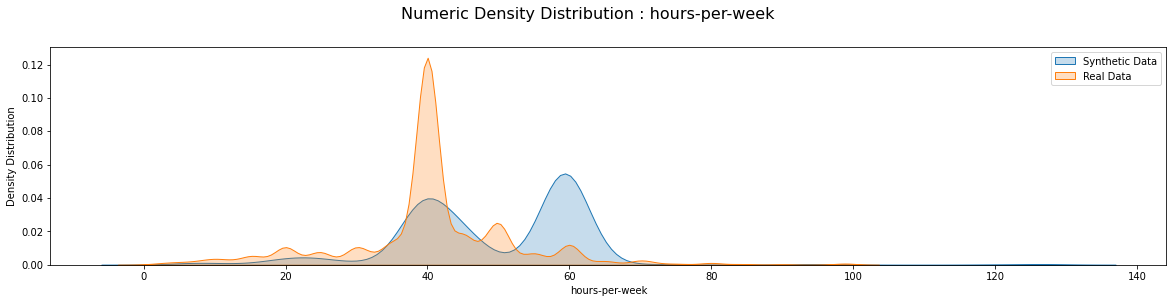

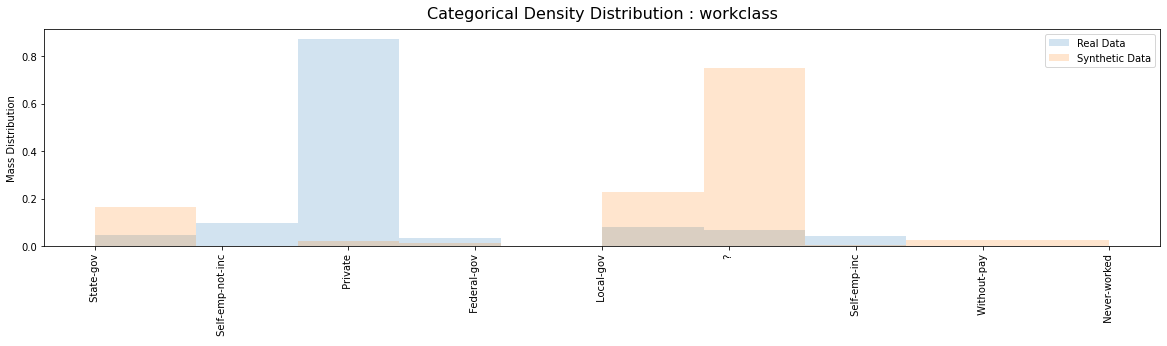

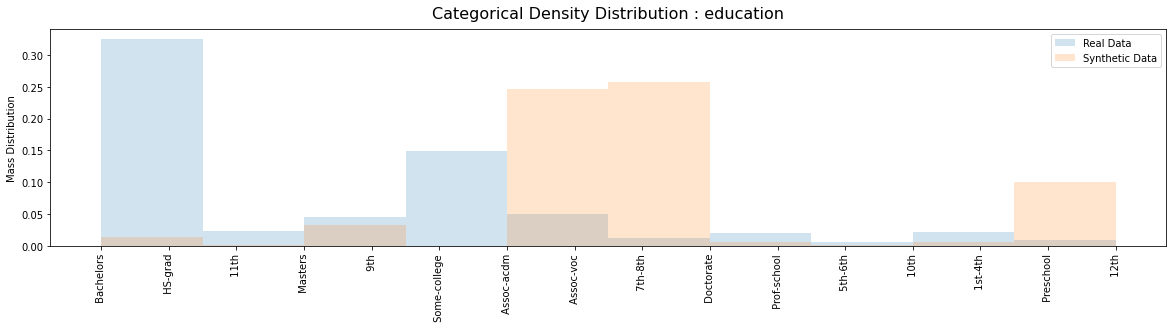

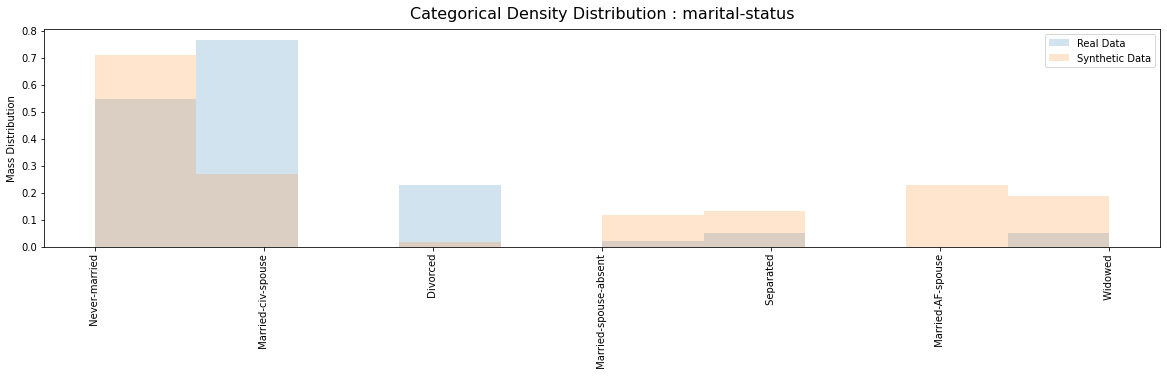

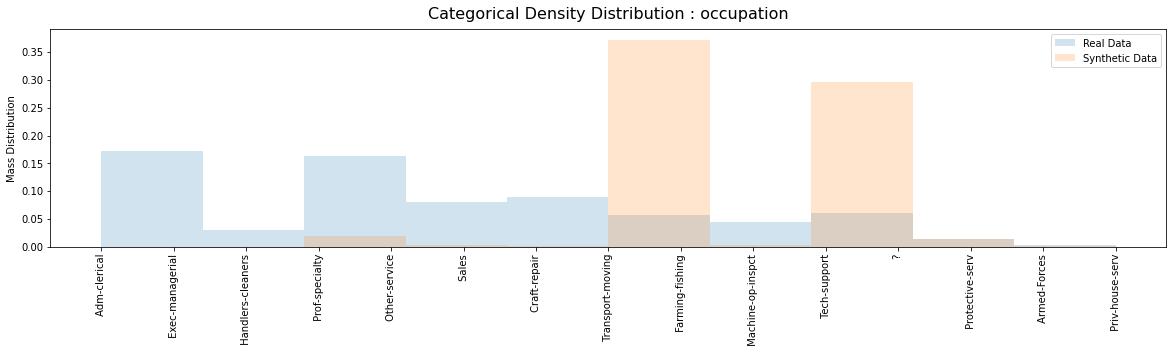

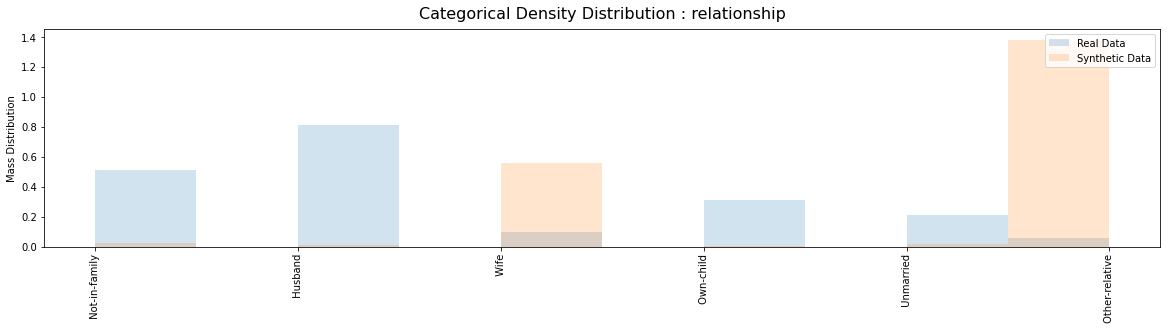

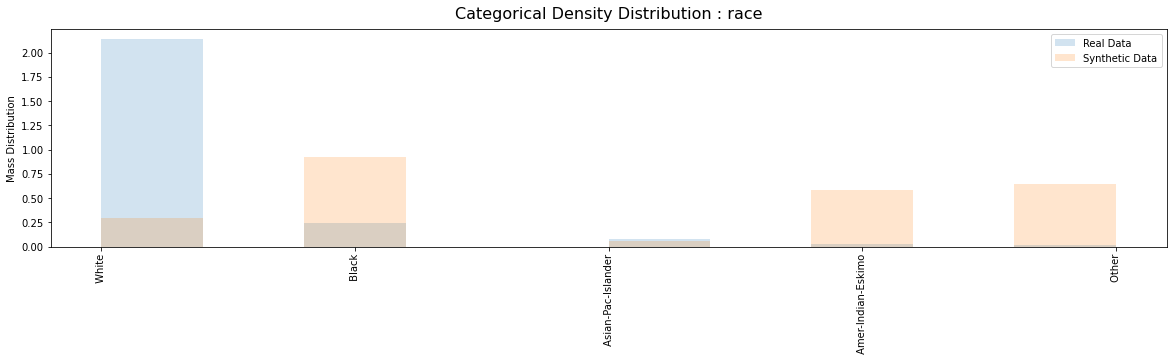

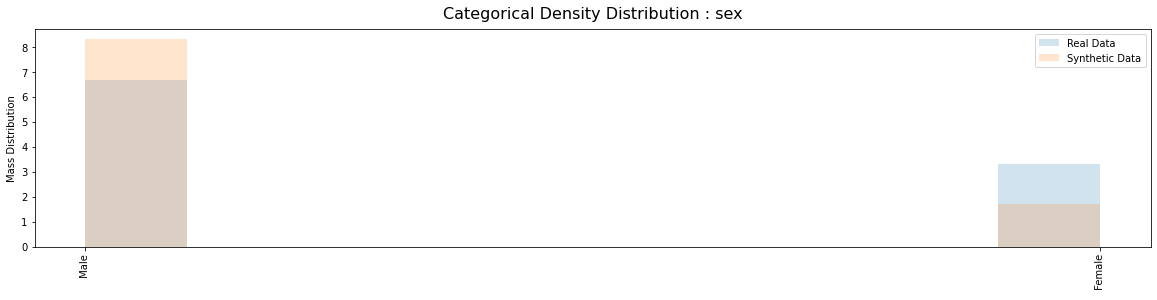

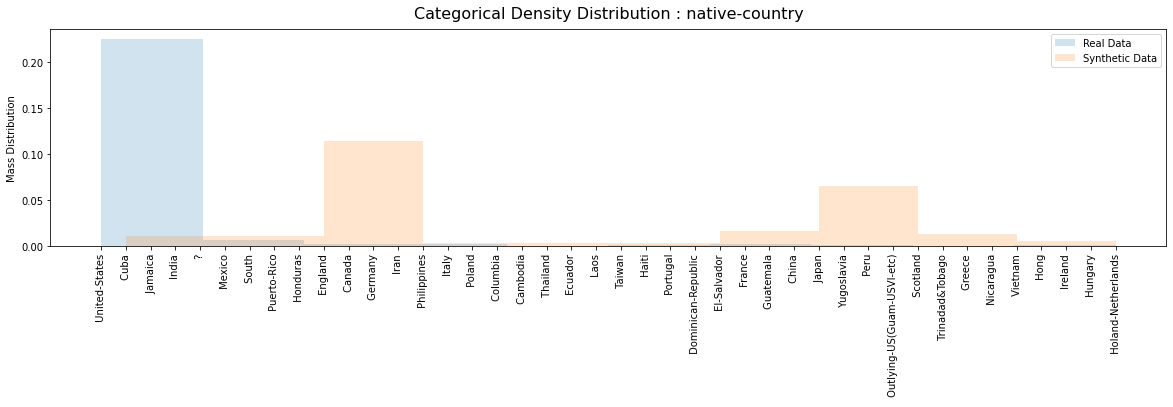

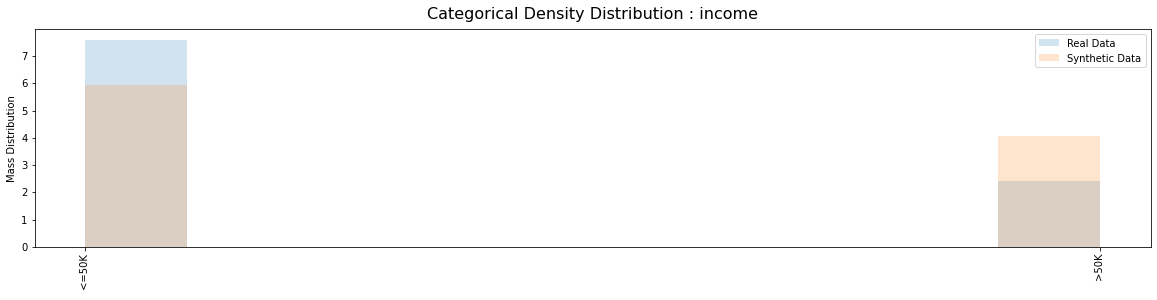

In [31]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

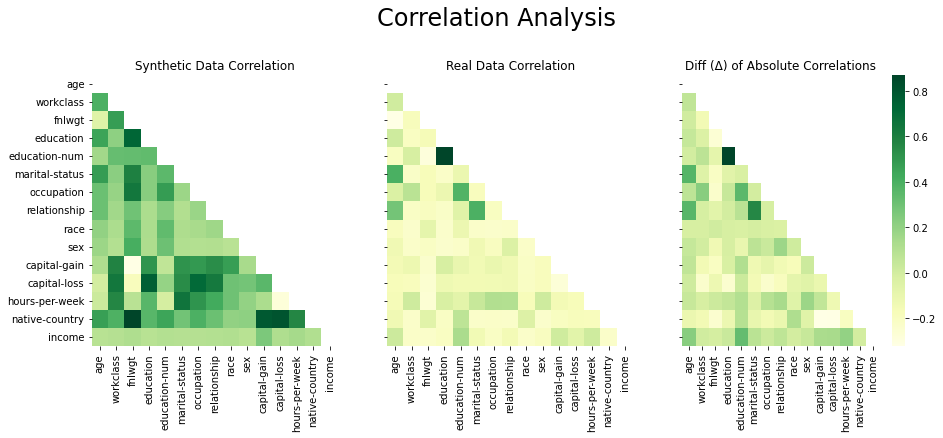

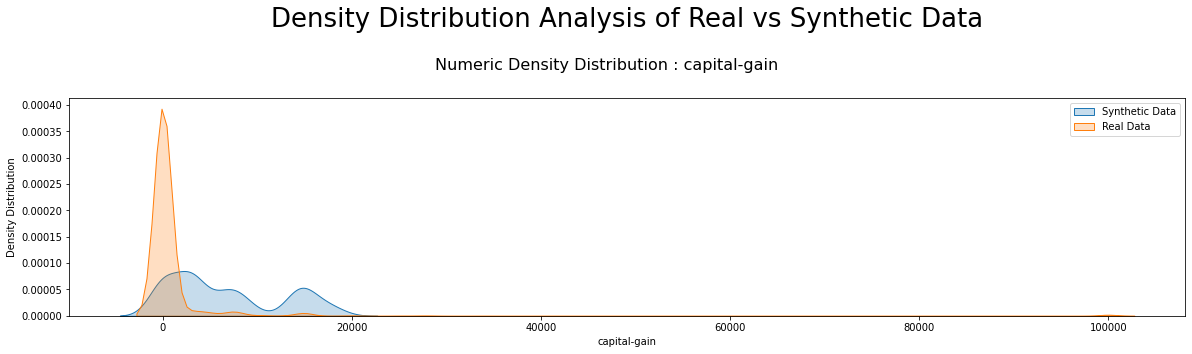

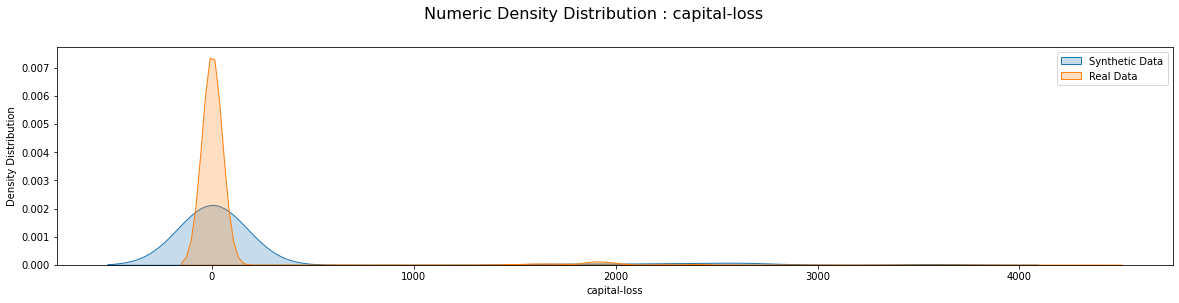

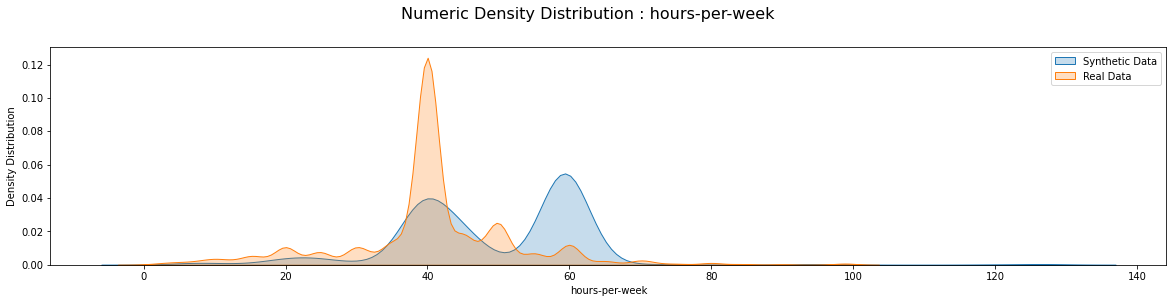

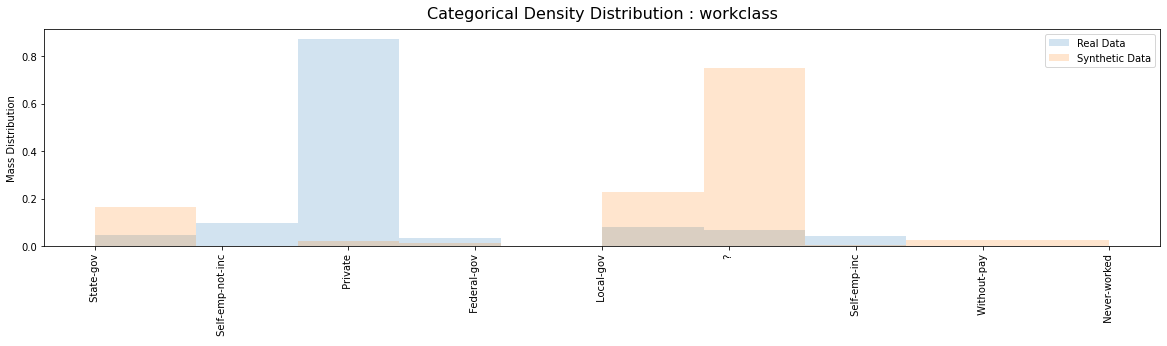

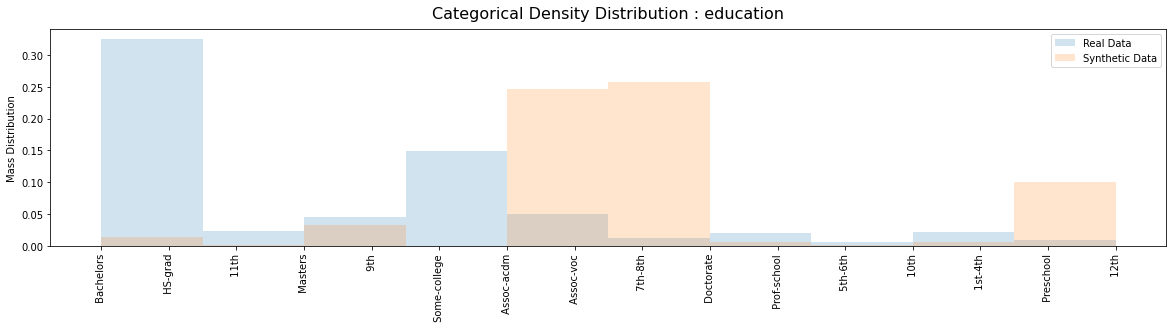

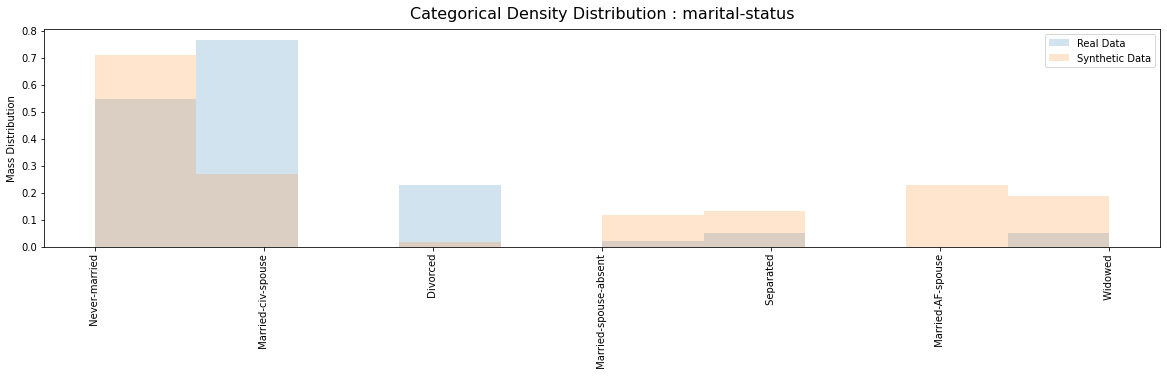

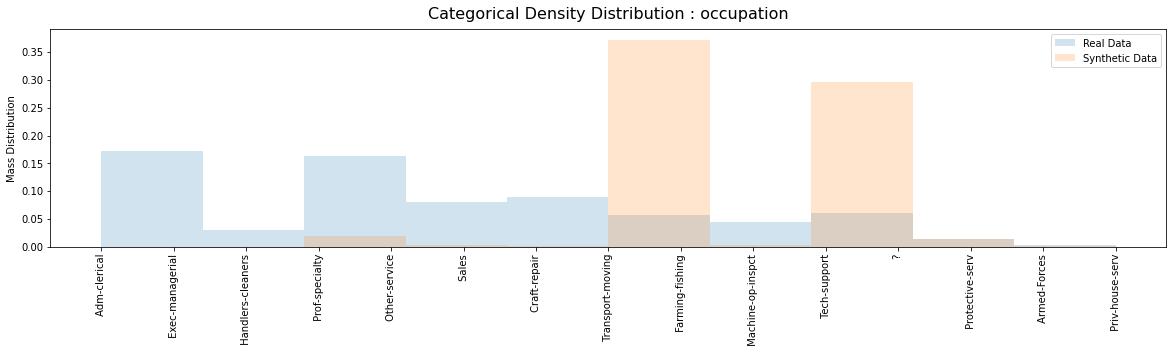

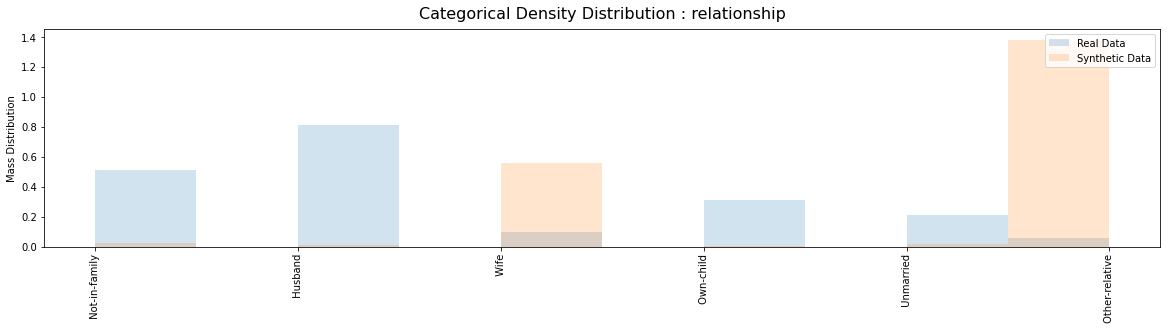

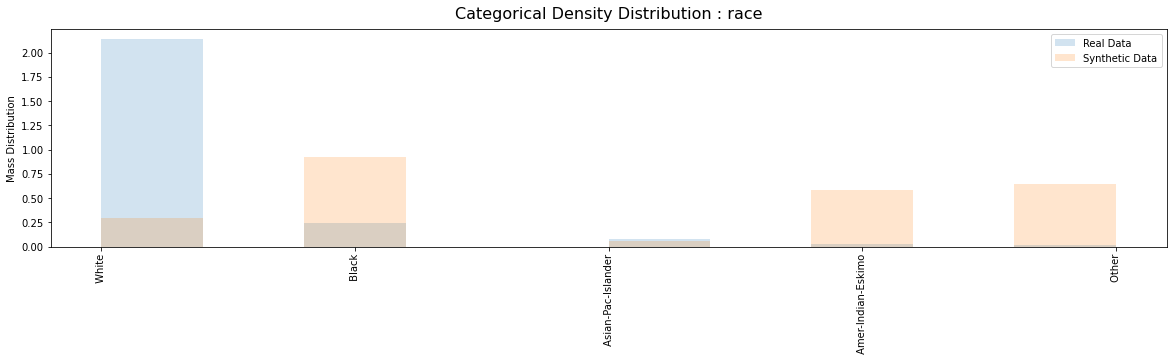

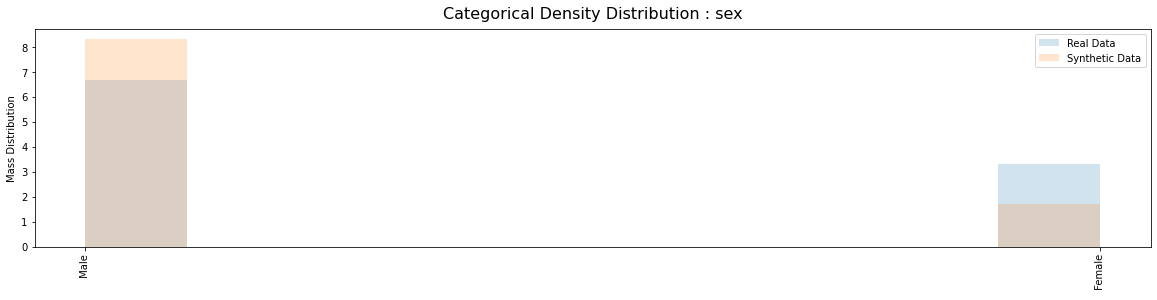

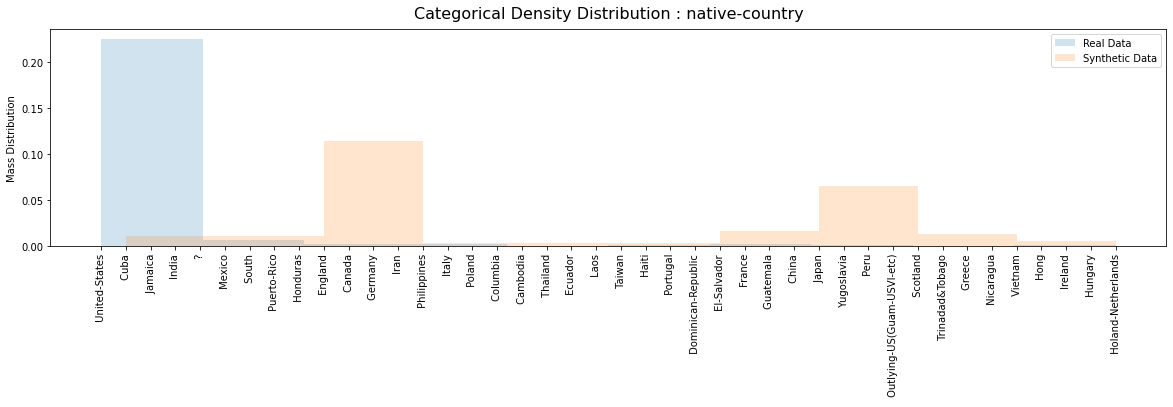

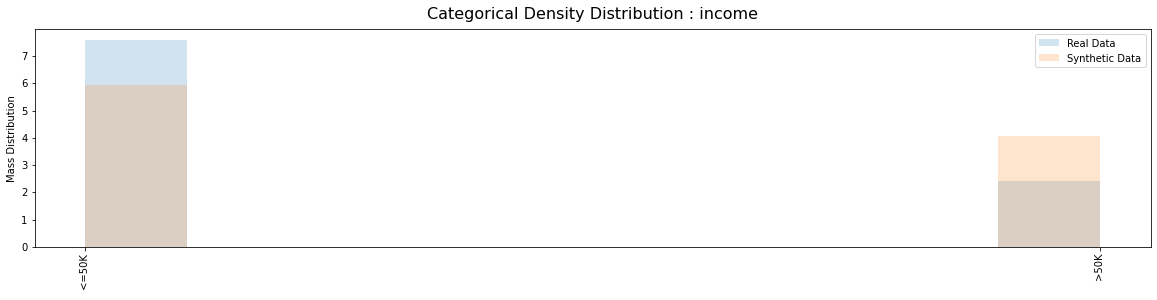

In [32]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [33]:
synth.save('C:/Users/Kaggle/wids/PrivateModelNormalAPI.pth')

#### 

## Adversarial API: Privately differentiable synthesizer

In [34]:
synth = PrivateTwinSynthesizer(epsilon=0.1,batch_size=64,device='cuda')   ### cpu else cuda

In [35]:
synth.fit_adversarial(data=data,discrete_columns=discrete_columns,update_epsilon=1)

Generating train and test splits ...
TRAIN SAMPLES: n=26048
TEST SAMPLES: n=6513
Iteration: [1]  [  0/129]  eta: 0:00:48  loss_t_fake: 0.6741 (0.8718)  loss_t_real: 0.6098 (0.6526)  time: 0.3749  data: 0.0000  max mem: 60
Iteration: [1]  [ 50/129]  eta: 0:00:29  loss_t_fake: 0.0105 (0.1270)  loss_t_real: 0.0496 (0.2799)  time: 0.3756  data: 0.0000  max mem: 60
Iteration: [1]  [100/129]  eta: 0:00:11  loss_t_fake: 0.0022 (0.0667)  loss_t_real: 0.0096 (0.1526)  time: 0.3680  data: 0.0000  max mem: 60
Iteration: [1]  [129/129]  eta: 0:00:00  loss_t_fake: 0.0012 (0.0522)  loss_t_real: 0.0055 (0.1202)  time: 0.3752  data: 0.0000  max mem: 60
Iteration: [1] Total time: 0:00:48
Iteration: [1]  [0/4]  eta: 0:00:00  loss_t_fake: 0.0012 (0.0522)  loss_t_real: 0.0055 (0.1202)  loss_s: 0.6875 (0.6895)  time: 0.0937  data: 0.0000  max mem: 60
Iteration: [1]  [1/4]  eta: 0:00:00  loss_t_fake: 0.0012 (0.0522)  loss_t_real: 0.0055 (0.1202)  loss_s: 0.6996 (0.6953)  time: 0.1024  data: 0.0000  max mem:

Iteration: [3]  [100/406]  eta: 0:00:00  loss_t_fake: 0.0003 (0.0227)  loss_t_real: 0.0016 (0.0029)  loss_s: 1.2537 (1.3828)  loss_g: 0.1067 (0.1371)  time: 0.0029  data: 0.0000  max mem: 60
Iteration: [3]  [150/406]  eta: 0:00:00  loss_t_fake: 0.0003 (0.0227)  loss_t_real: 0.0016 (0.0029)  loss_s: 1.2537 (1.3828)  loss_g: 0.0984 (0.1251)  time: 0.0023  data: 0.0000  max mem: 60
Iteration: [3]  [200/406]  eta: 0:00:00  loss_t_fake: 0.0003 (0.0227)  loss_t_real: 0.0016 (0.0029)  loss_s: 1.2537 (1.3828)  loss_g: 0.0932 (0.1175)  time: 0.0027  data: 0.0000  max mem: 60
Iteration: [3]  [250/406]  eta: 0:00:00  loss_t_fake: 0.0003 (0.0227)  loss_t_real: 0.0016 (0.0029)  loss_s: 1.2537 (1.3828)  loss_g: 0.0852 (0.1116)  time: 0.0023  data: 0.0000  max mem: 60
Iteration: [3]  [300/406]  eta: 0:00:00  loss_t_fake: 0.0003 (0.0227)  loss_t_real: 0.0016 (0.0029)  loss_s: 1.2537 (1.3828)  loss_g: 0.0775 (0.1063)  time: 0.0026  data: 0.0000  max mem: 60
Iteration: [3]  [350/406]  eta: 0:00:00  loss

In [37]:
sample = synth.sample_adversarial(data,1000)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [38]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

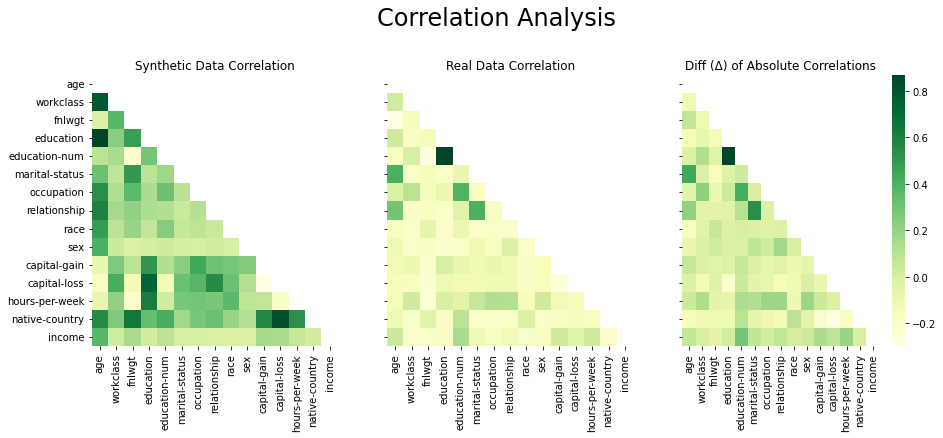

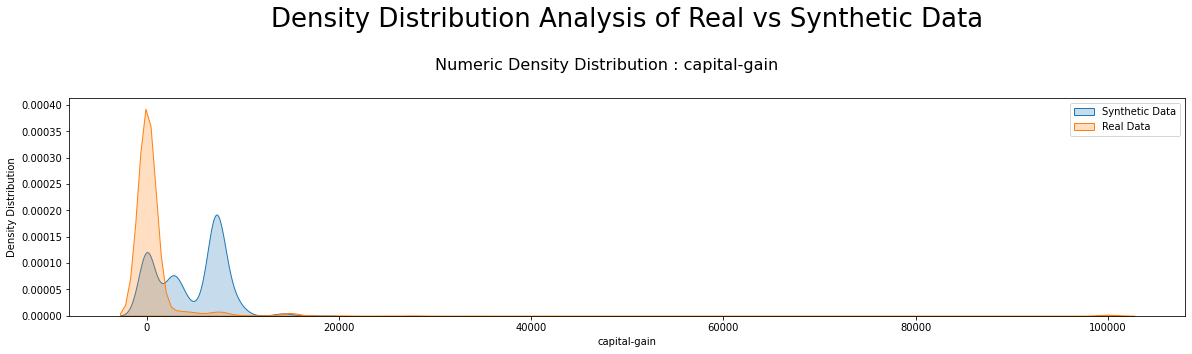

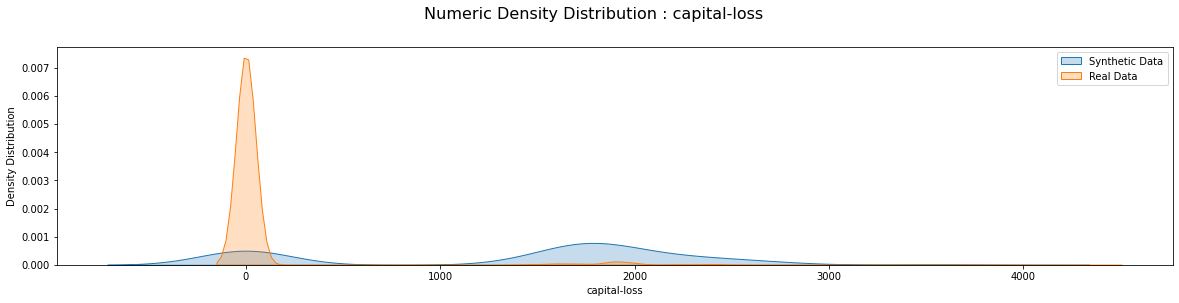

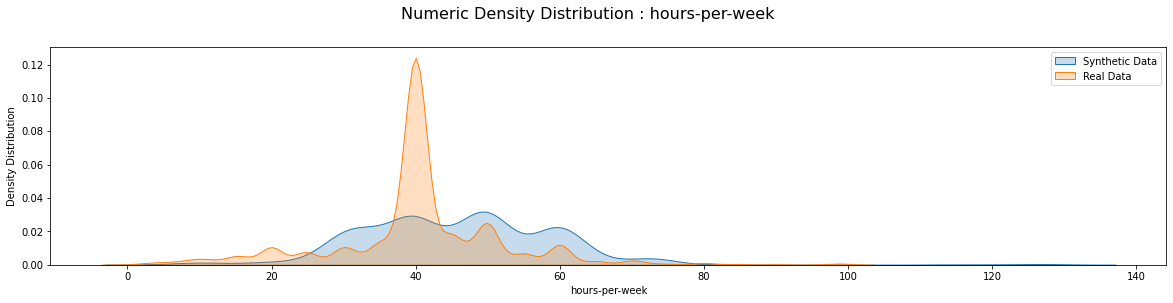

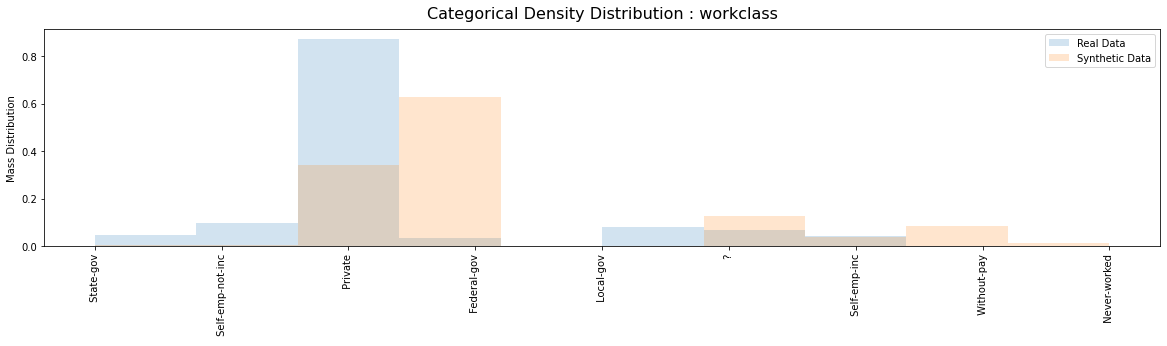

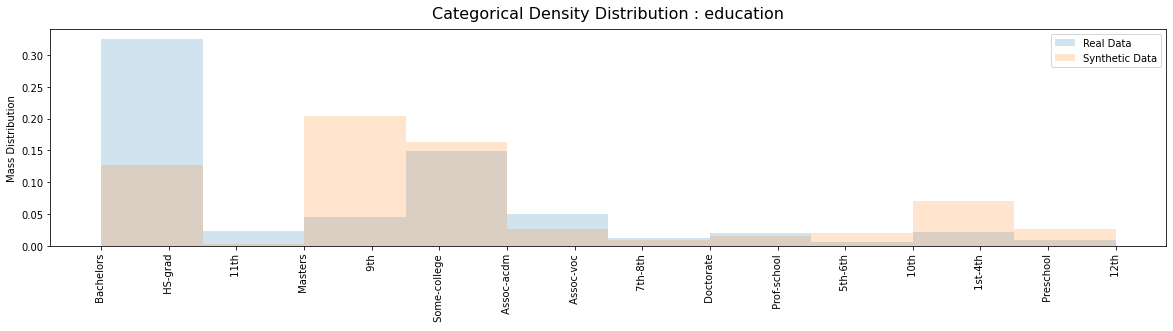

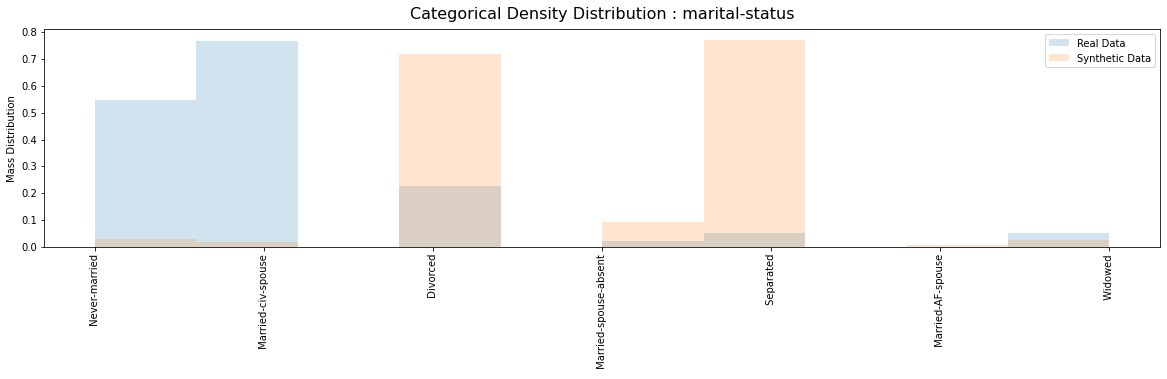

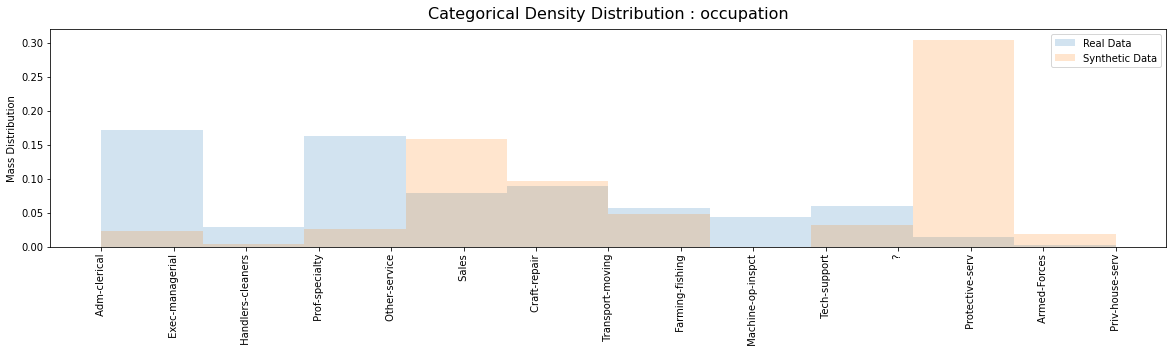

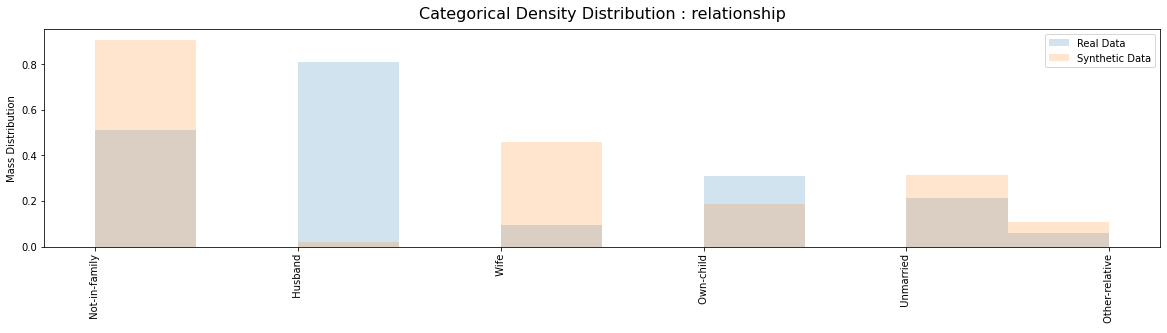

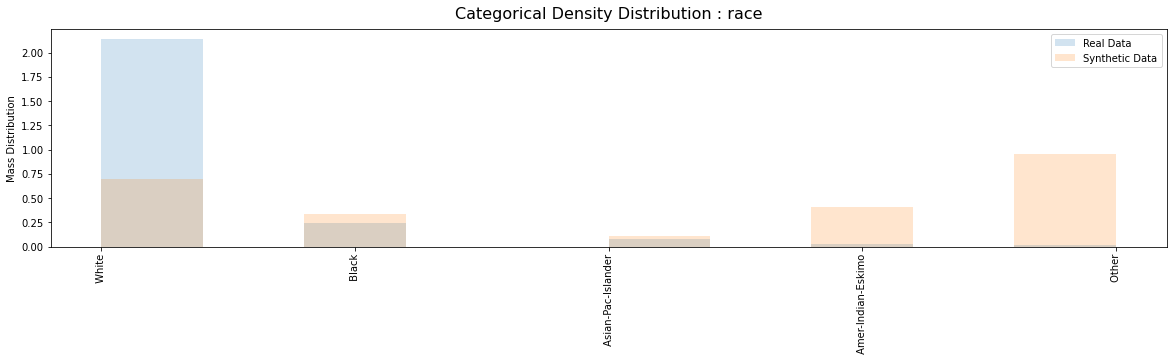

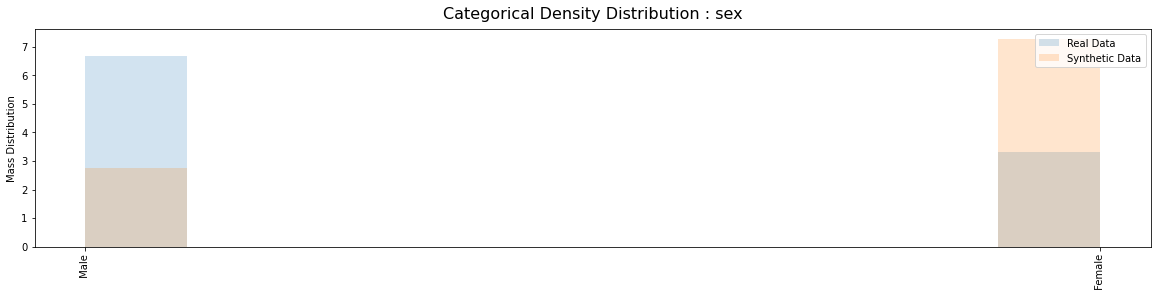

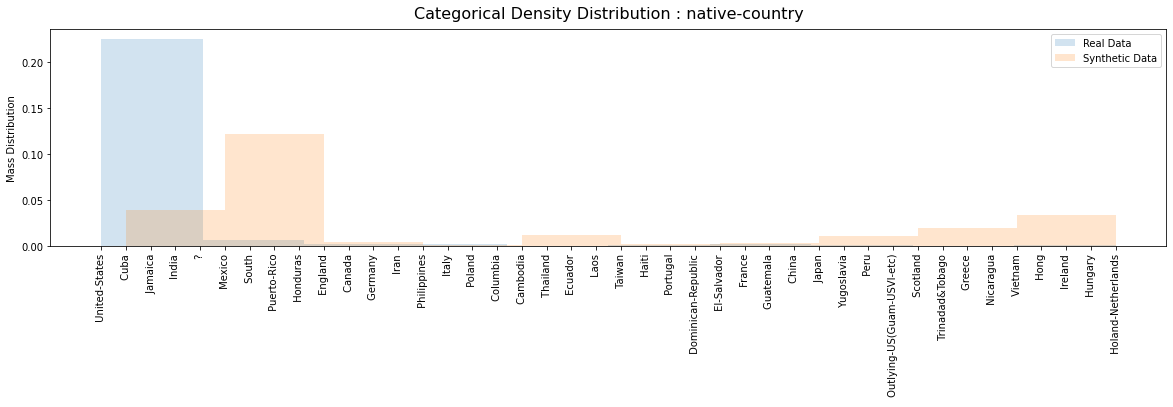

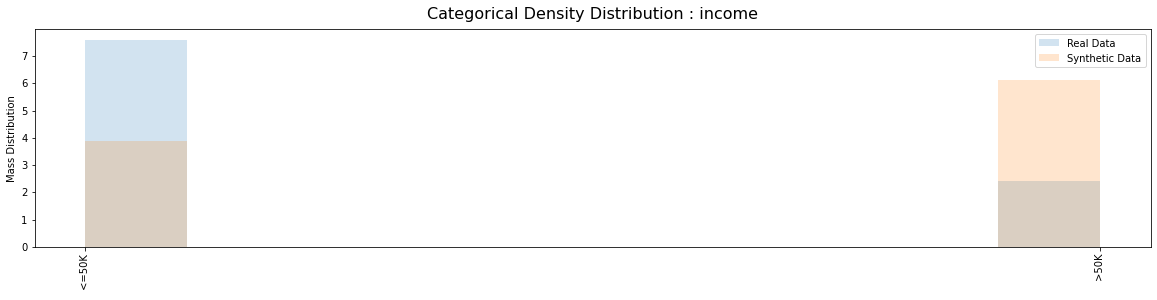

In [39]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

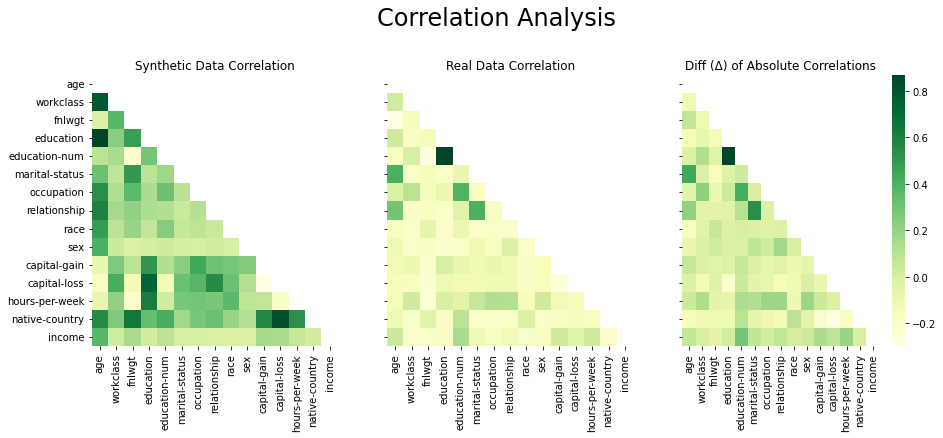

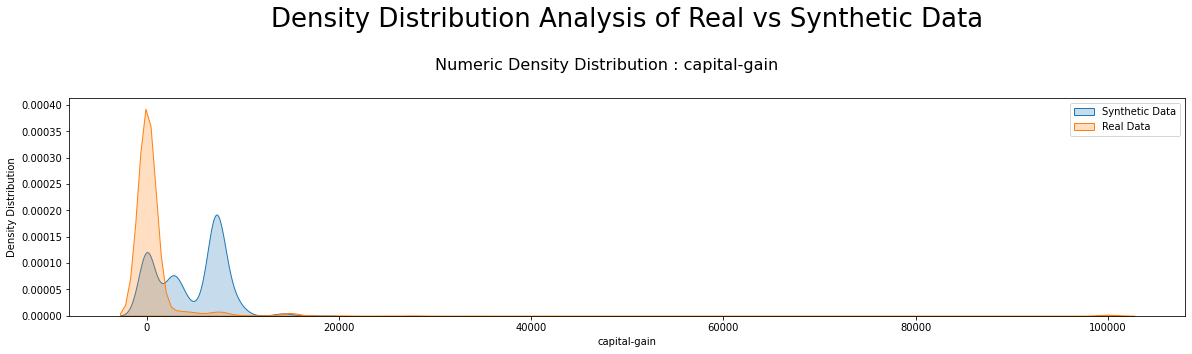

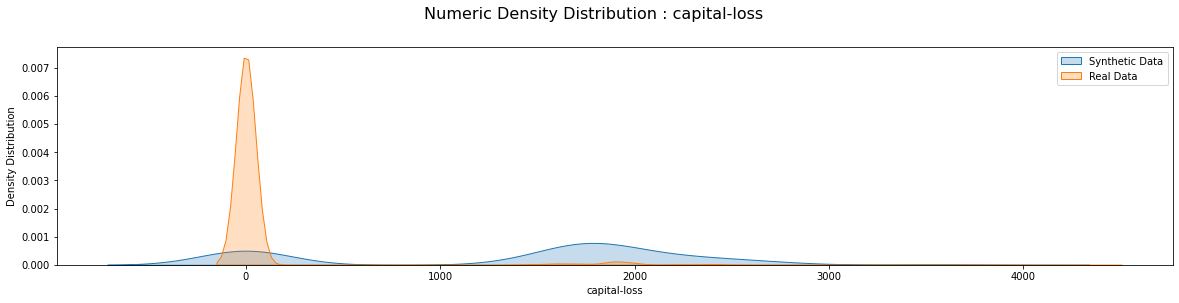

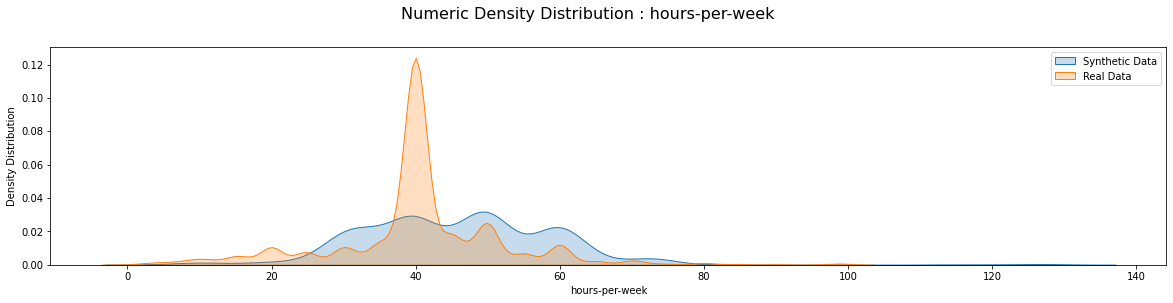

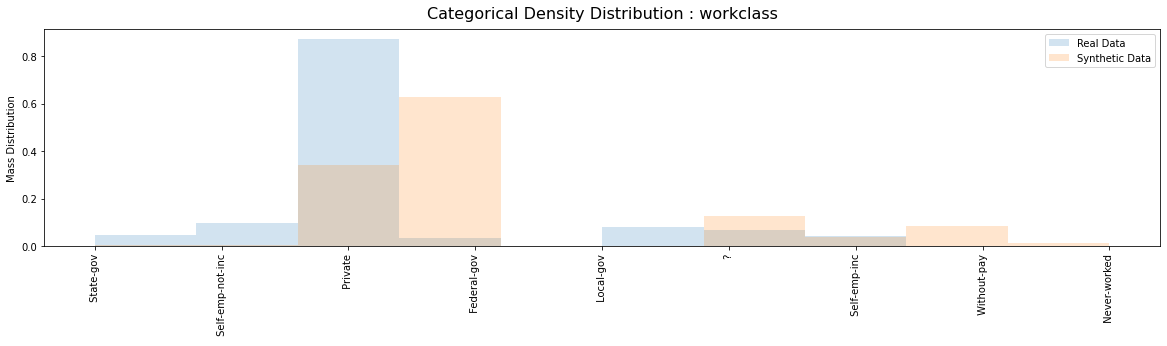

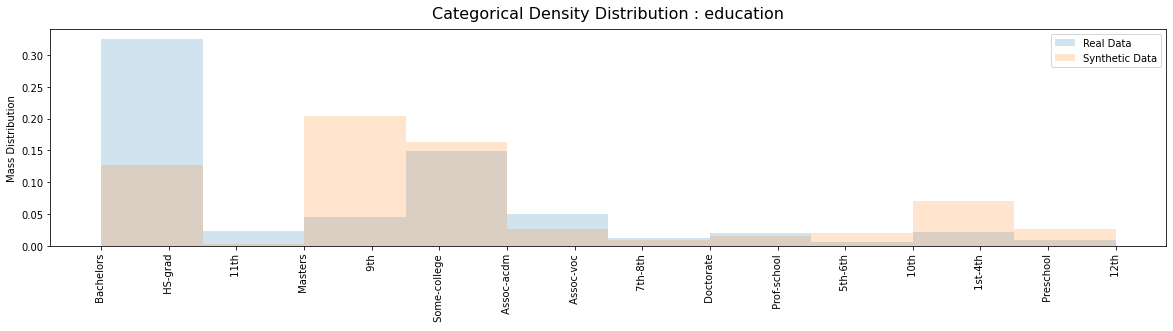

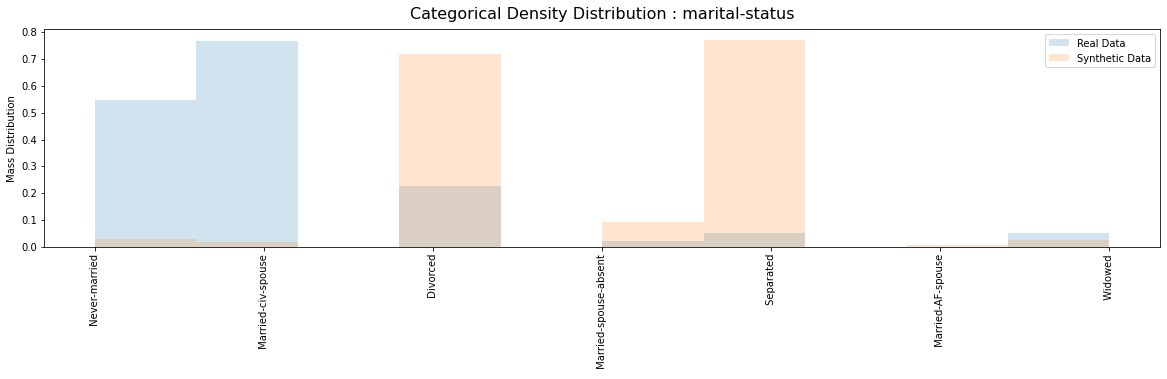

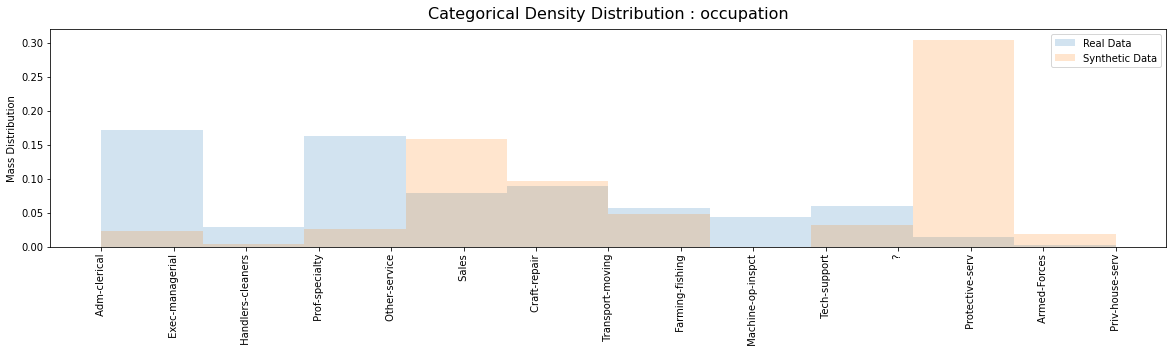

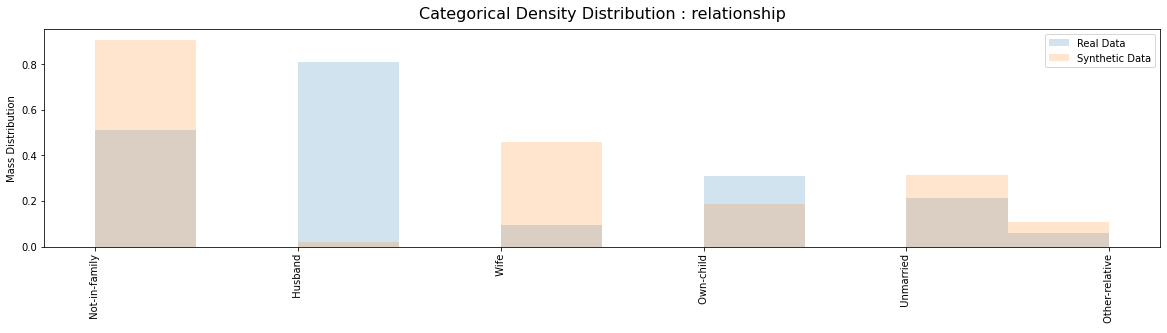

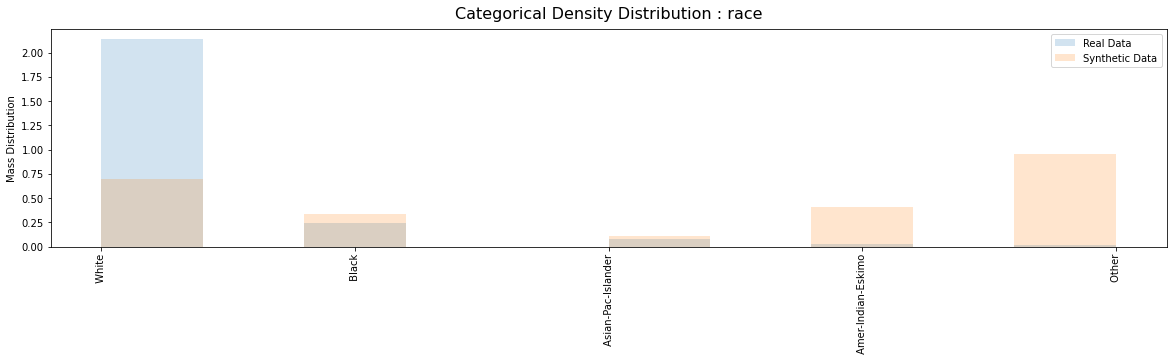

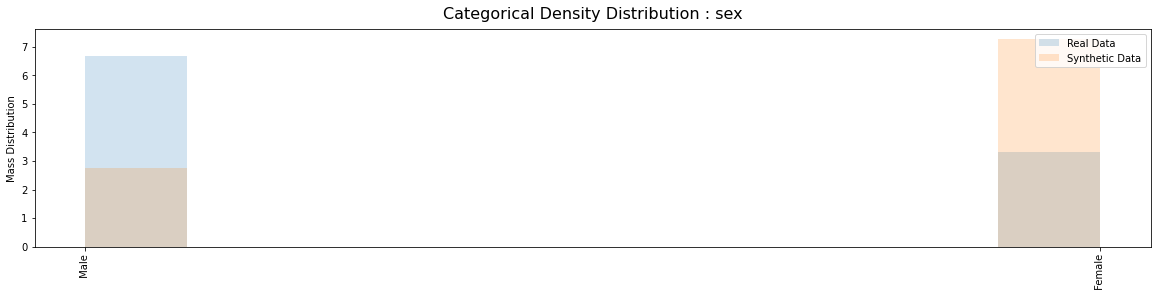

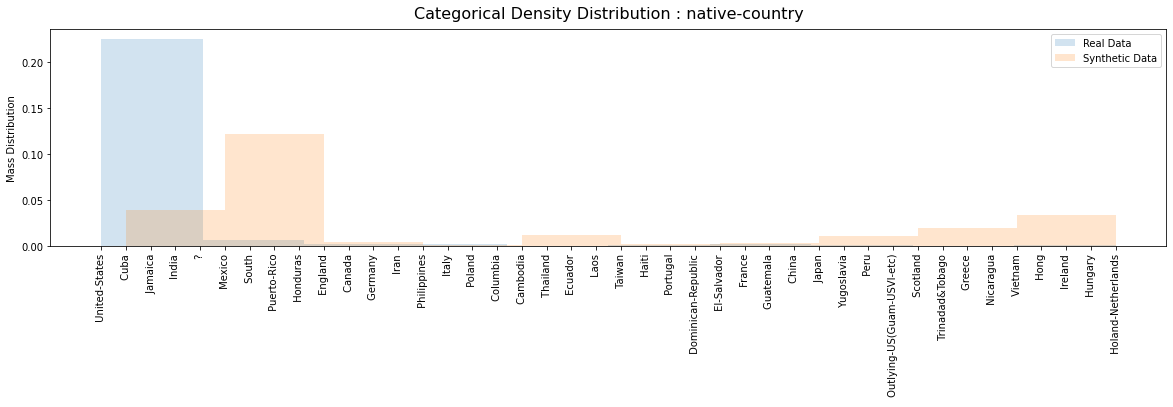

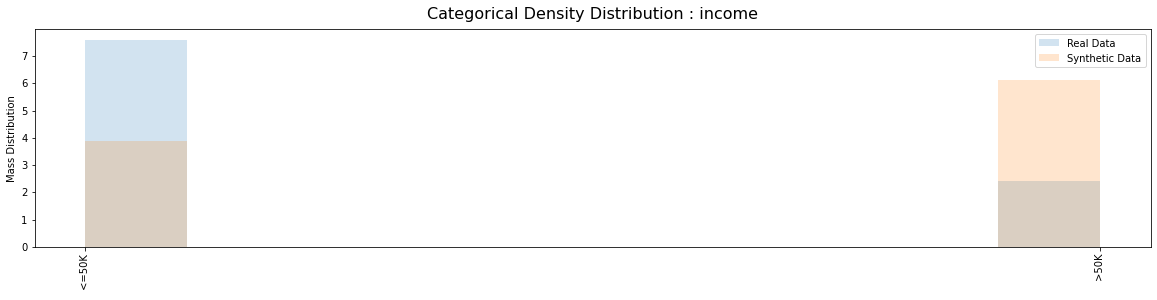

In [40]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

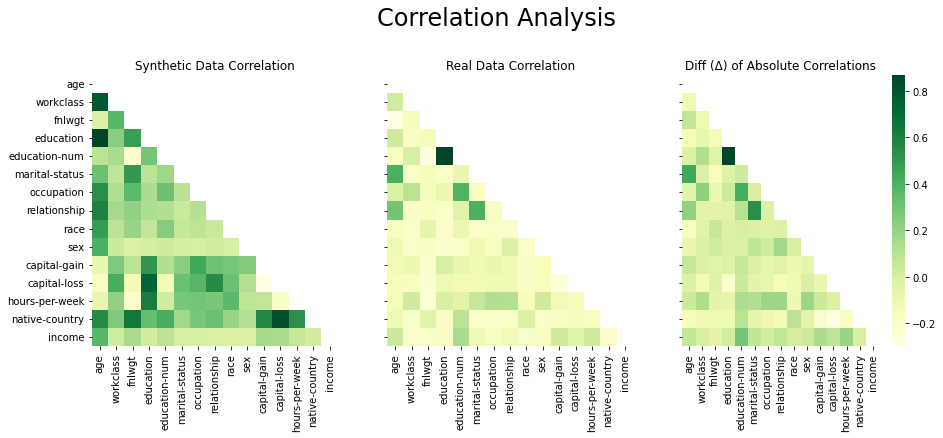

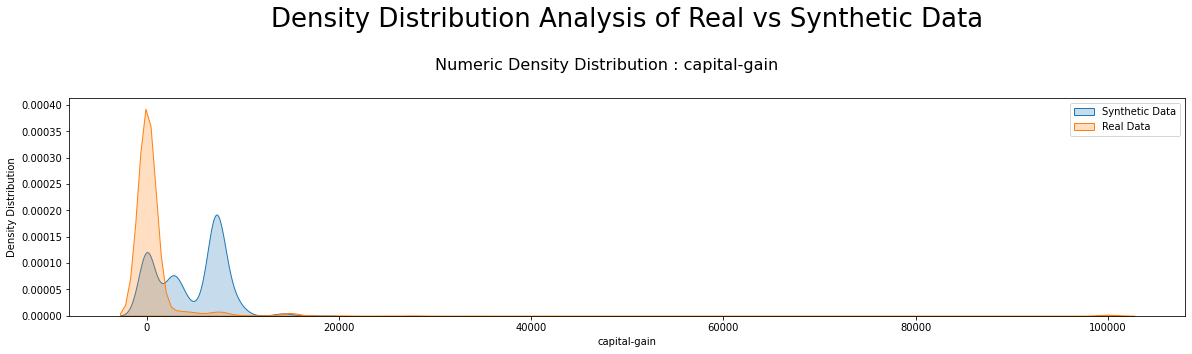

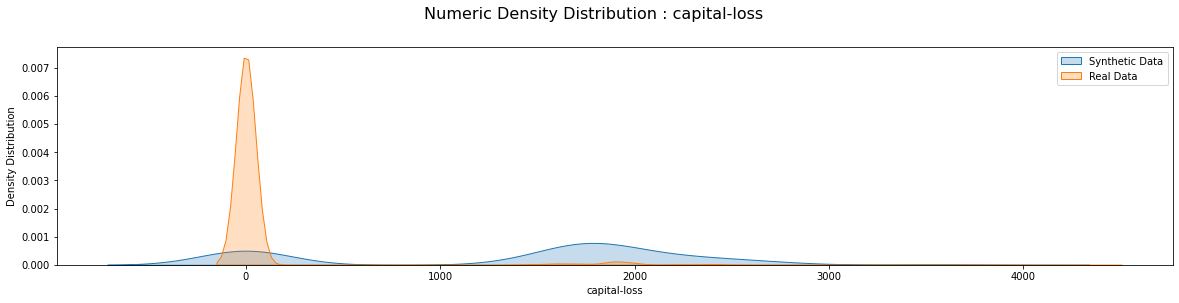

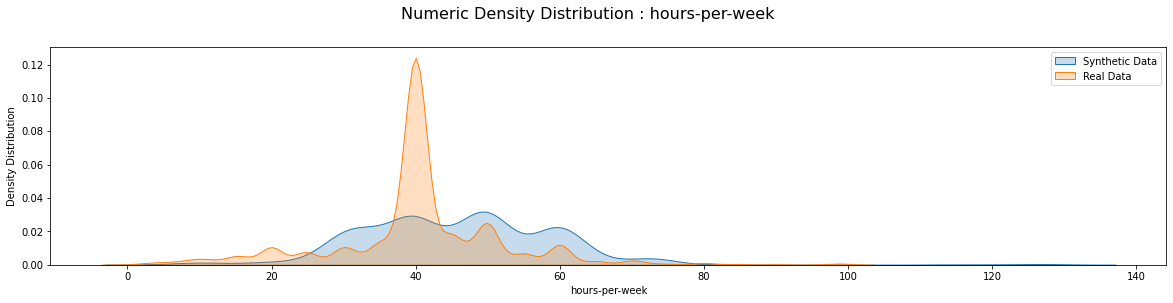

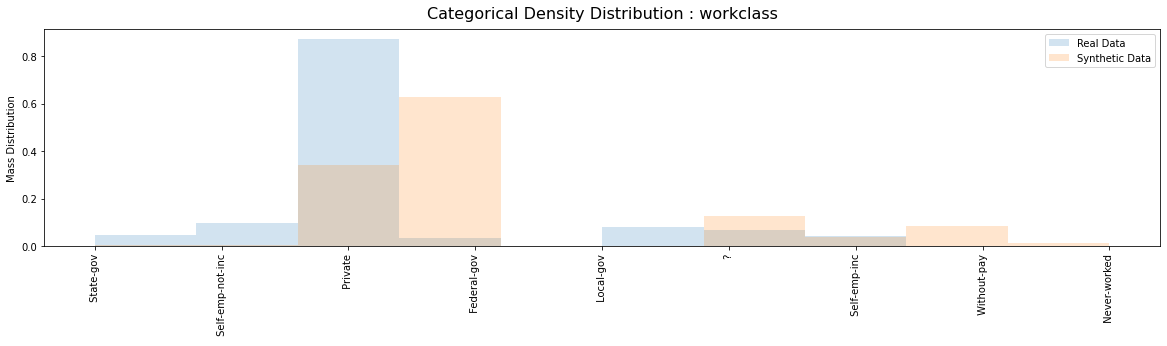

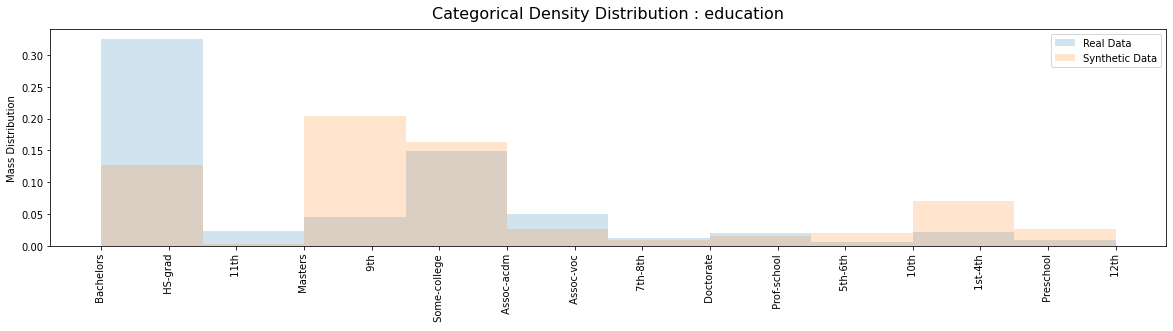

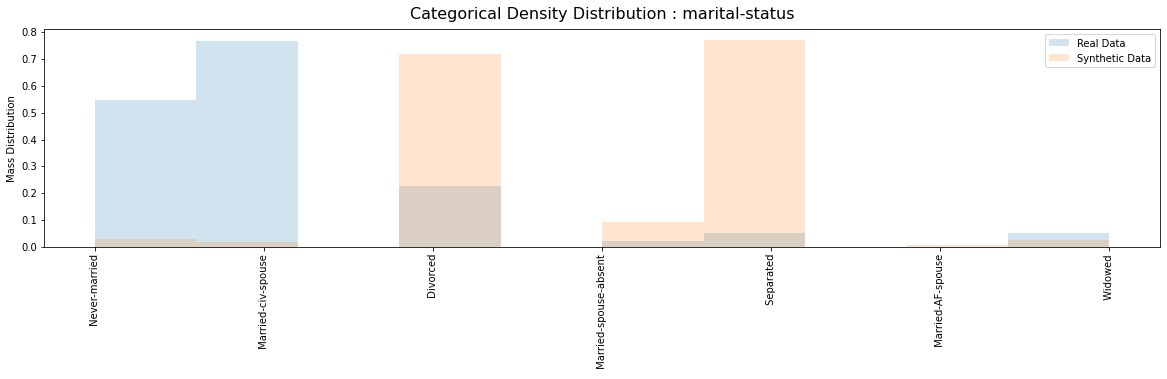

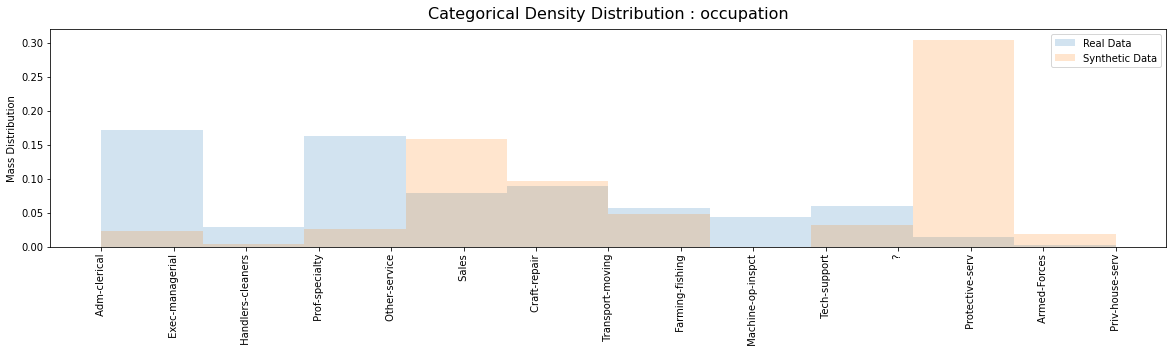

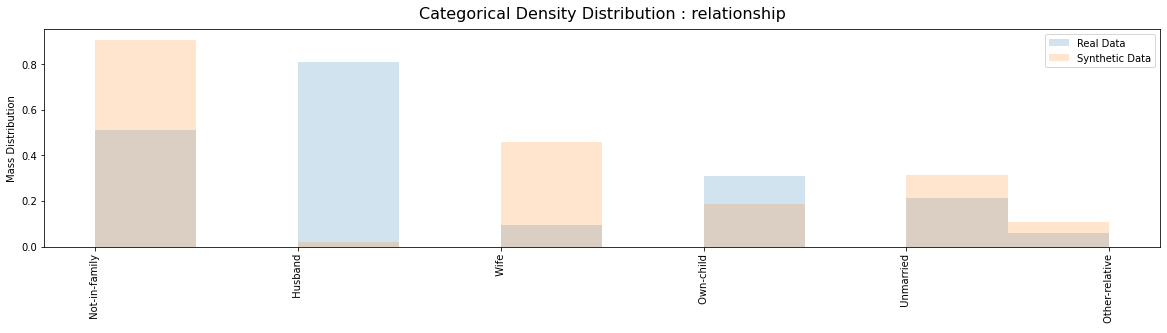

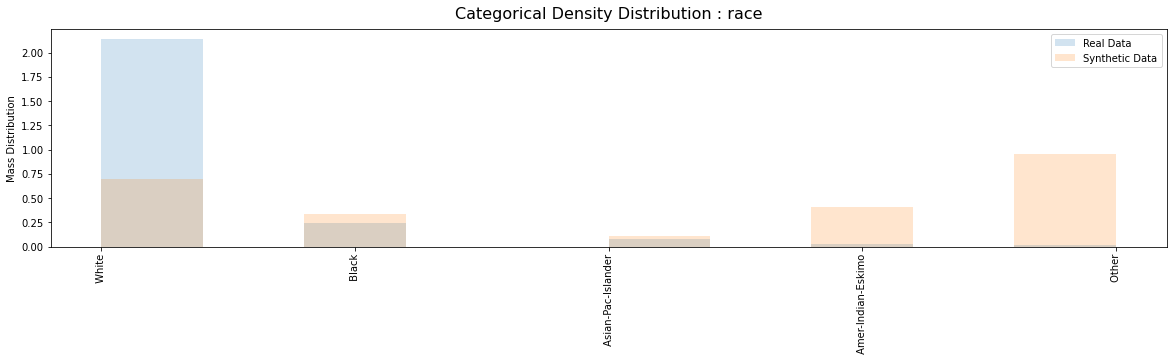

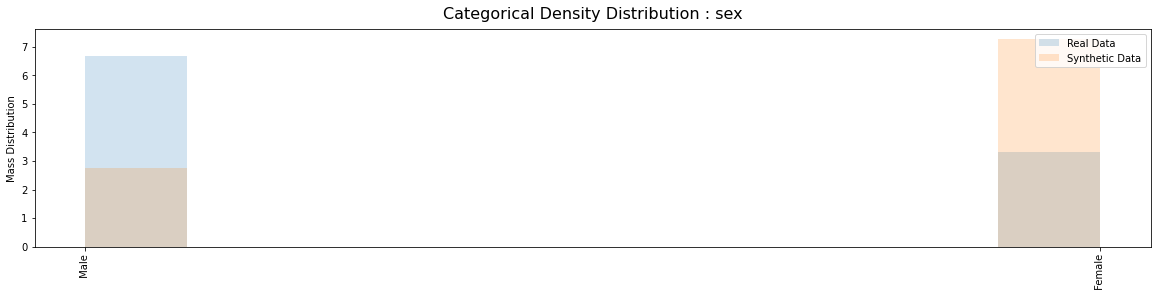

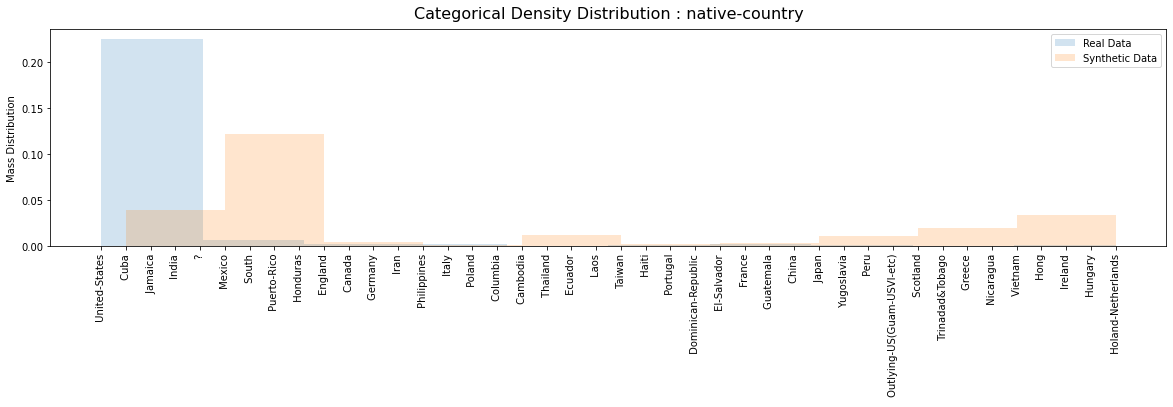

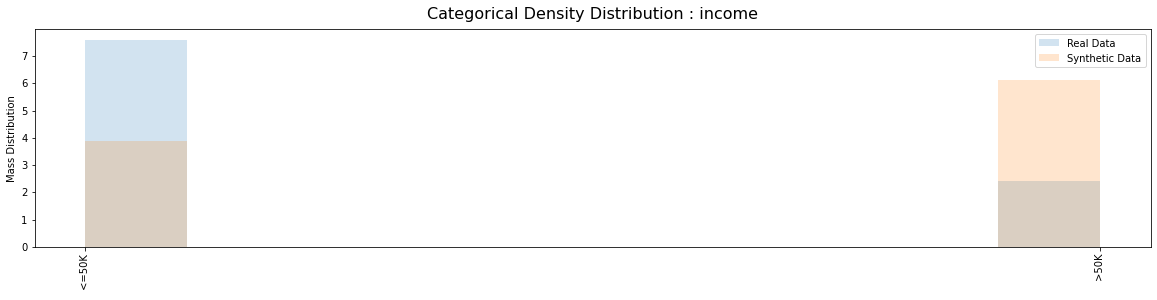

In [41]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [42]:
synth.save('C:/Users/Kaggle/wids/PrivateModelAdvAPI.pth')

#### 

### Fin ###